In [1]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from sklearn.externals import joblib
from scipy import stats
from scipy.optimize import minimize
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from matplotlib.colors import LogNorm

import seaborn as sns 
import random
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/Users/yang/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

data_dir = '/Users/yang/Jupyter/UCB/DATA_200/final_project/data/'
fig_dir = '/Users/yang/Jupyter/UCB/DATA_200/final_project/figures/'

<Figure size 432x288 with 0 Axes>

# read data

In [3]:
# updated Apr. 7, 2021

# https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp
data_depression =  pd.read_csv(data_dir + 'nchs_covid_indicators_of_anxiety_depression.csv')

# https://data.cdc.gov/NCHS/Mental-Health-Care-in-the-Last-4-Weeks/yni7-er2q
data_mental_hc =  pd.read_csv(data_dir + 'nchs_covid_mental_health_care.csv')

# https://data.cdc.gov/NCHS/Indicators-of-Reduced-Access-to-Care-Due-to-the-Co/xb3p-q62w
data_reduce_access_hc =  pd.read_csv(data_dir + 'nchs_covid_reduced_access_to_health_care.csv')

# https://data.cdc.gov/NCHS/Indicators-of-Health-Insurance-Coverage-at-the-Tim/jb9g-gnvr
data_insurance_coverage =  pd.read_csv(data_dir + 'nchs_covid_health_insurance_coverage.csv')

In [4]:
print(data_depression.shape)
data_depression.head()

(5574, 14)


Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 29 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  30 - 39 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  40 - 49 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  50 - 59 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   23.5    22.7     24.3         22.7 - 24.3   
1  05/05/2020 12:00:00 AM   32.7    30.2     35.2         30.2 - 35.2   
2  05/05/2020 12:00:00 AM   25.7    24.1     27.3         24.1 - 27.3   
3  05/05/2020 12:00:00 AM   24.8    23.3     26.2         23.3 - 26.2   
4  05/05/2020 12:00:00 AM   23.2    21.5     25.0         21.5 - 25.0   

  Quartile Range  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [5]:
print(data_mental_hc.shape)
data_mental_hc.head()

(4116, 15)


Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period Time Period Label  \
0  United States  United States     2           13   Aug 19 - Aug 31   
1  United States  18 - 29 years     2           13   Aug 19 - Aug 31   
2  United States  30 - 39 years     2           13   Aug 19 - Aug 31   
3  United States  40 - 49 years     2           13   Aug 19 - Aug 31   
4  United States  50 - 59 years     2           13   Aug 19 - Aug 31   

   Time Period Start Date    Time Period End Date  Value  LowCI  HighCI  \
0  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   19.4   19.0    19.8   
1  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   18.7   17.2    20.3   
2  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   18.3   17.3    19.2   
3  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   20.4   19.5    21.3   
4  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   21.2   20.2    22.2   

  Confidence Interval Quartile Range  Suppression Flag  
0         19.0 - 19.8            NaN               NaN  
1         17.2 - 20.3            NaN               NaN  
2         17.3 - 19.2            NaN               NaN  
3         19.5 - 21.3            NaN               NaN  
4         20.2 - 22.2            NaN               NaN

In [6]:
print(data_reduce_access_hc.shape)
data_reduce_access_hc.head()

(5574, 14)


Indicator              Group          State  \
0  Delayed Medical Care, Last 4 Weeks  National Estimate  United States   
1  Delayed Medical Care, Last 4 Weeks             By Age  United States   
2  Delayed Medical Care, Last 4 Weeks             By Age  United States   
3  Delayed Medical Care, Last 4 Weeks             By Age  United States   
4  Delayed Medical Care, Last 4 Weeks             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 29 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  30 - 39 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  40 - 49 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  50 - 59 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   38.7    38.1     39.4         38.1 - 39.4   
1  05/05/2020 12:00:00 AM   34.8    32.5     37.2         32.5 - 37.2   
2  05/05/2020 12:00:00 AM   37.3    35.6     39.0         35.6 - 39.0   
3  05/05/2020 12:00:00 AM   40.3    39.0     41.7         39.0 - 41.7   
4  05/05/2020 12:00:00 AM   40.7    39.3     42.2         39.3 - 42.2   

  Quartile Range  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [7]:
print(data_insurance_coverage.shape)
data_insurance_coverage.head()

(5322, 15)


Indicator              Group          State  \
0  Uninsured at the Time of Interview  National Estimate  United States   
1  Uninsured at the Time of Interview             By Age  United States   
2  Uninsured at the Time of Interview             By Age  United States   
3  Uninsured at the Time of Interview             By Age  United States   
4  Uninsured at the Time of Interview             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 24 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  25 - 34 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  35 - 44 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  45 - 64 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   12.6    12.1     13.3         12.1 - 13.3   
1  05/05/2020 12:00:00 AM   17.7    14.2     21.6         14.2 - 21.6   
2  05/05/2020 12:00:00 AM   16.8    15.6     18.1         15.6 - 18.1   
3  05/05/2020 12:00:00 AM   12.1    10.7     13.6         10.7 - 13.6   
4  05/05/2020 12:00:00 AM    9.5     8.8     10.2          8.8 - 10.2   

  Quartile Range  Suppression Flag  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN

# EDA

## 1. data_depression: depression and anxiety

In [8]:
print(data_depression.keys())
print(data_depression['Indicator'].unique())
print(data_depression['Group'].unique())
print(data_depression['Subgroup'].unique())

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range'],
      dtype='object')
['Symptoms of Depressive Disorder' 'Symptoms of Anxiety Disorder'
 'Symptoms of Anxiety Disorder or Depressive Disorder']
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State']
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female' 'Hispanic or Latino' 'Non-Hispanic white, single race'
 'Non-Hispanic black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticu

In [9]:
def fillnan(data): # fill null by -999 
    data = data.copy()
    # fill nan
    data = data.fillna(-999)
    # remove empty week
    data = data.drop(data[data['Phase']=='-1'].index)
    # reformat start date
    data['start date'] = data['Time Period Start Date'].str.split(' 12', expand=True)[0]
    
    return data
data_depression = fillnan(data_depression)
data_depression.head()

Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 29 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  30 - 39 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  40 - 49 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  50 - 59 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   23.5    22.7     24.3         22.7 - 24.3   
1  05/05/2020 12:00:00 AM   32.7    30.2     35.2         30.2 - 35.2   
2  05/05/2020 12:00:00 AM   25.7    24.1     27.3         24.1 - 27.3   
3  05/05/2020 12:00:00 AM   24.8    23.3     26.2         23.3 - 26.2   
4  05/05/2020 12:00:00 AM   23.2    21.5     25.0         21.5 - 25.0   

  Quartile Range  start date  
0           -999  04/23/2020  
1           -999  04/23/2020  
2           -999  04/23/2020  
3           -999  04/23/2020  
4           -999  04/23/2020

In [10]:
def get_val(indicator, group):
    cut1 = (data_depression['Indicator'] == indicator)
    cut2 = (data_depression['Group'] == group)
    df = data_depression.loc[cut1 & cut2]
    vals = df['Value']
    upper = df['High CI']
    lower = df['Low CI']
    time = df['Time Period']
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').reset_index()['start date']
    return time, date, vals, lower, upper

time_dep, date_dep, val_dep, lower_dep, upper_dep = get_val('Symptoms of Depressive Disorder', 'National Estimate')
time_anx, date_anx, val_anx, lower_anx, upper_anx = get_val('Symptoms of Anxiety Disorder', 'National Estimate')
time_any, date_any, val_any, lower_any, upper_any = get_val('Symptoms of Anxiety Disorder or Depressive Disorder', 'National Estimate')

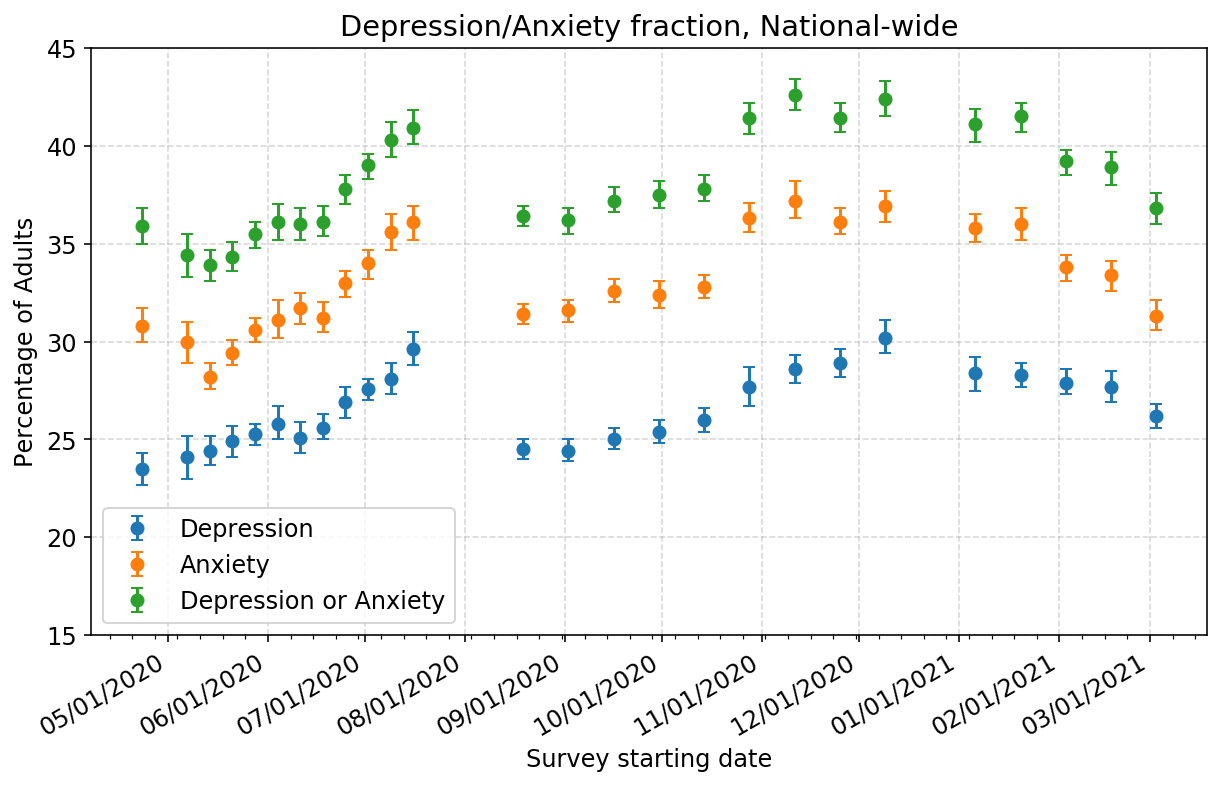

In [11]:
plt.figure(figsize=(10,6))

plt.errorbar(date_dep, val_dep, yerr=[val_dep - lower_dep, upper_dep - val_dep], fmt='o', capsize=3, label='Depression')
plt.errorbar(date_anx, val_anx, yerr=[val_anx - lower_anx, upper_anx - val_anx], fmt='o', capsize=3, label='Anxiety')
plt.errorbar(date_any, val_any, yerr=[val_any - lower_any, upper_any - val_any], fmt='o', capsize=3, label='Depression or Anxiety')

plt.title('Depression/Anxiety fraction, National-wide')
plt.xlabel('Survey starting date')
plt.ylabel('Percentage of Adults')
plt.legend(loc='lower left')
plt.ylim(15,45)
plt.grid(linestyle='--', alpha=0.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1, byweekday=MO))

plt.gcf().autofmt_xdate()
# ax.figure.autofmt_xdate(rotation=45, ha='center')
# ax.set_xlim(date_dep.min(), date_dep.max())
plt.savefig(fig_dir + 'data-depression-depression-anxiety-fraction-national-wide.png', dpi=300, bbox='tight')
plt.show()

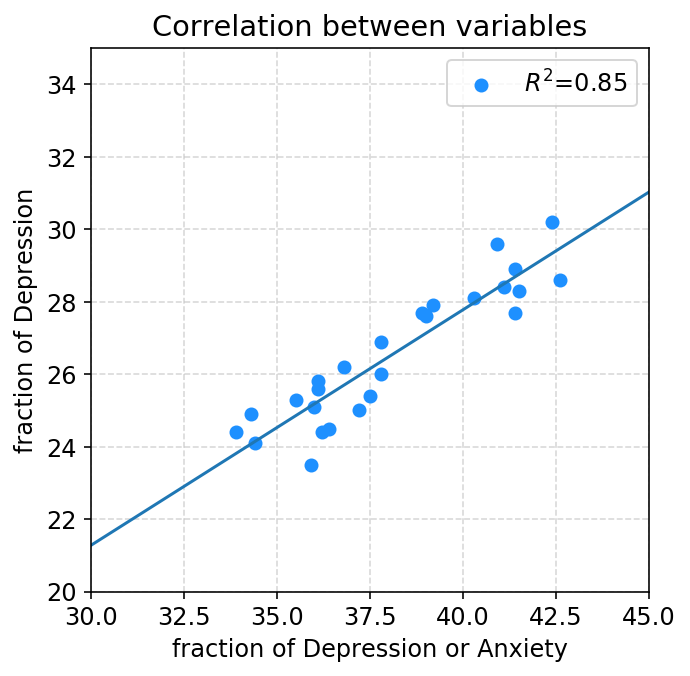

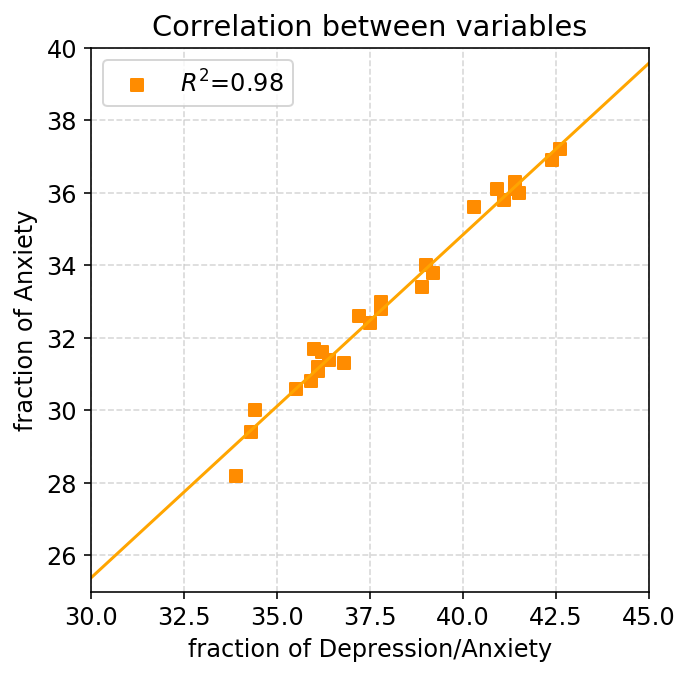

In [12]:
t = np.arange(30, 45, 0.01)
plt.figure(figsize=(5,5))
slope, intercept, r_value, p_value, std_err = ci.stats.linregress(val_any, val_dep)
plt.plot(t, slope*t + intercept)
plt.scatter(x=val_any, y=val_dep, color='dodgerblue',label=r'$R^2$='+str(np.round(r_value**2,2)))
plt.xlabel('fraction of Depression or Anxiety')
plt.ylabel('fraction of Depression')
plt.title('Correlation between variables')
plt.xlim(30,45)
plt.ylim(20,35)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.savefig(fig_dir + 'data-depression-corr-1.png', dpi=300, bbox='tight')
plt.show()

plt.figure(figsize=(5,5))
slope, intercept, r_value, p_value, std_err = ci.stats.linregress(val_any, val_anx)
plt.plot(t, slope*t + intercept, color='orange',)
plt.scatter(val_any, val_anx, marker='s', color='darkorange',label=r'$R^2$='+str(np.round(r_value**2,2)))
plt.xlabel('fraction of Depression/Anxiety')
plt.ylabel('fraction of Anxiety')
plt.title('Correlation between variables')
plt.xlim(30,45)
plt.ylim(25,40)
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.savefig(fig_dir + 'data-depression-corr-2.png', dpi=300, bbox='tight')
plt.show()

In [13]:
def get_val(group, subgroup):
    cut1 = (data_depression['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')
    cut2 = (data_depression['Group'] == group)
    cut3 = (data_depression['Subgroup'] == subgroup)

    df = data_depression.loc[cut1 & cut2 & cut3]
    vals = df['Value'].values
    upper = df['High CI'].values
    lower = df['Low CI'].values
    time = df['Time Period'].values
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').values
    
    return time, date, vals, lower, upper

In [14]:
def make_plot_by_group(by_category):
    plt.figure(figsize=(10,7))
    cmap = matplotlib.cm.get_cmap('jet')

    categories = data_depression.loc[data_depression['Group']==by_category]['Subgroup'].unique()
    cnt = 0
    y_low = 100
    y_max = 0
    val_each_category = []
    for subgroup in categories:
        _, date, val, lower, upper = get_val(by_category, subgroup)
        plt.plot(date, val, 'o-', label=subgroup, color=cmap(cnt))
        plt.fill_between(date, lower, upper, alpha=0.3, color=cmap(cnt))
        
        cnt += 1/(len(categories)-1)
        y_low = min(y_low, np.min(lower))
        y_max = max(y_max, np.max(upper))
        val_each_category.append(val)
    plt.plot(date_any, val_any, '-.', color='grey', lw=3, label='National Average, without uncertainty')
    width = y_max - y_low
    plt.title('Depression/Anxiety fraction ' + by_category)
    plt.xlabel('Survey starting date')
    plt.ylabel('Percentage of Adults')
    plt.legend(loc='lower right', prop={'size':11})
    plt.ylim(y_low - width*0.25, y_max + width*0.05)
    plt.grid(linestyle='--', alpha=0.5)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1, byweekday=MO))

    plt.gcf().autofmt_xdate()
    plt.savefig(fig_dir + 'data-depression-' + by_category.split('/')[0].split('By ')[-1] + '.png', dpi=300, bbox='tight')
    plt.show()
    
    # do t test between pairs
    n = len(categories)
    mat = np.zeros((n, n)) - 1
    for i in range(0,n):
        for j in range(i+1,n):
            _, pval = stats.ttest_1samp(val_each_category[i]-val_each_category[j], 0)
            mat[i,j] = pval
    max_i, max_j = np.unravel_index(mat.argmax(), mat.shape)

    # visualize distribution differences from 0
    plt.figure(figsize=(8,6))
    diffs = []
    for i in range(0,n):
        for j in range(i+1,n):
            diff = val_each_category[i] - val_each_category[j]
            if i==max_i and j==max_j:
                print('Most un-separated categories: ', categories[i] + ' and ' + categories[j])
                plt.hist(diff, histtype='bar', alpha=0.5, density=True, label='Max p-value = '+str(np.round(np.max(mat),4)))
            else:
                plt.hist(diff, histtype='bar', alpha=0.5, density=True)
    plt.title('1-sample t test for differences between subgroups')
    plt.xlabel('Pair-wise Differences between subgroups')
    plt.ylabel('Probability density')
    plt.axvline(0, linestyle='--',color='black', label=r'$H_0$: mean of differences is 0')
    plt.legend(loc='upper right')
    plt.grid(linestyle='--', alpha=0.5)
    plt.savefig(fig_dir + 'data-depression-' + by_category.split('/')[0].split('By ')[-1] + '-ttest.png', dpi=300, bbox='tight')
    plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/yang/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


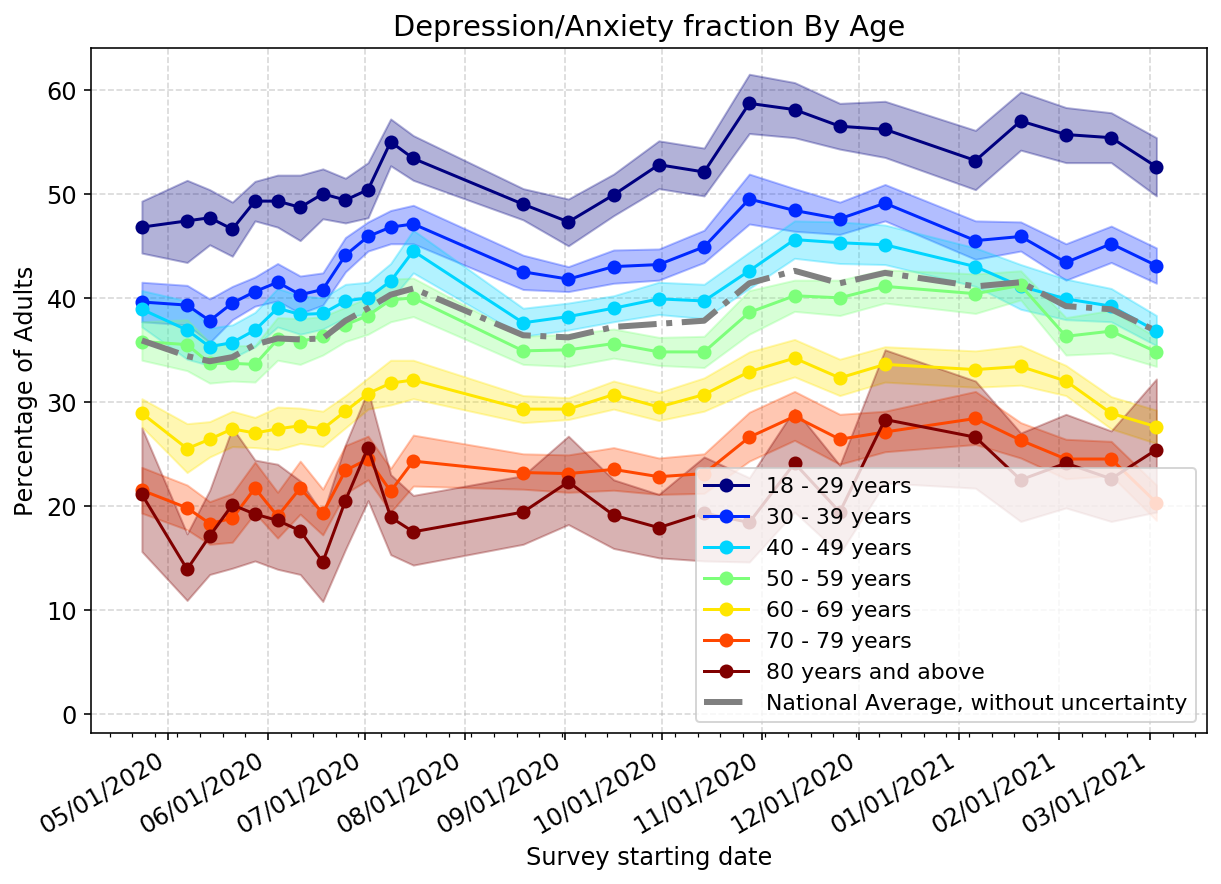

Most un-separated categories:  70 - 79 years and 80 years and above


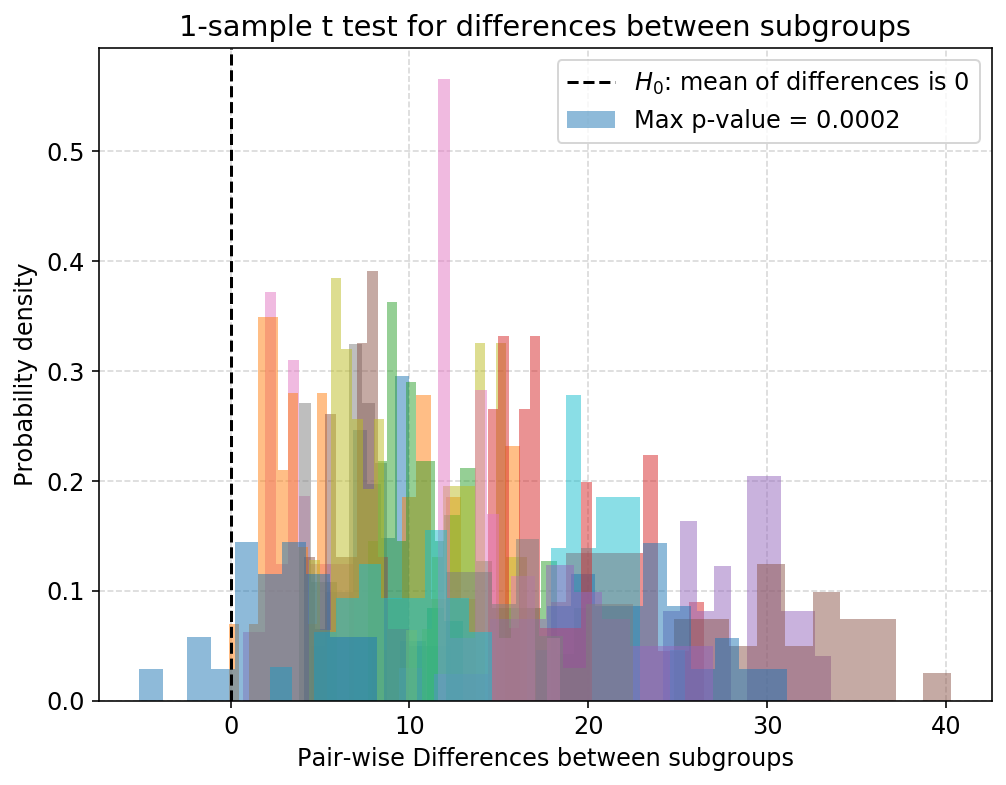

In [15]:
make_plot_by_group('By Age')

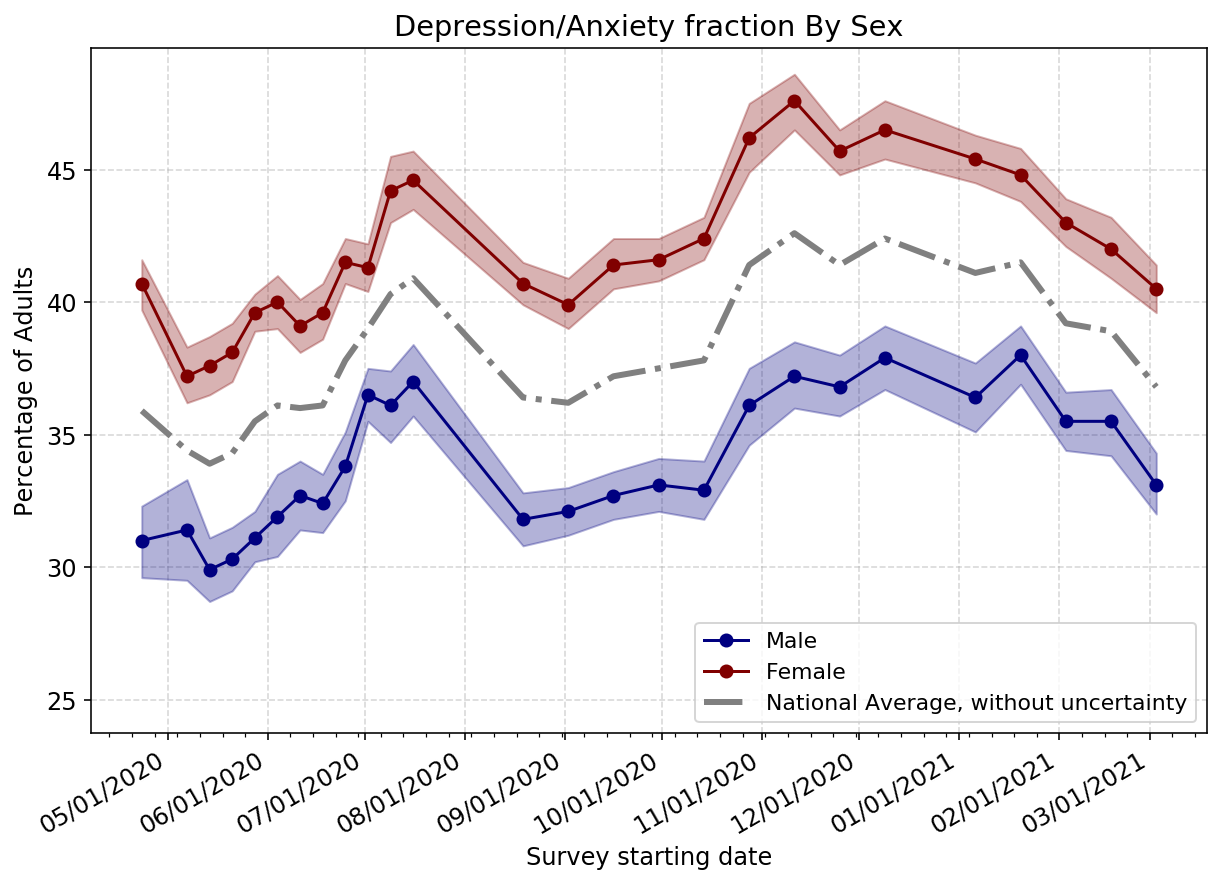

Most un-separated categories:  Male and Female


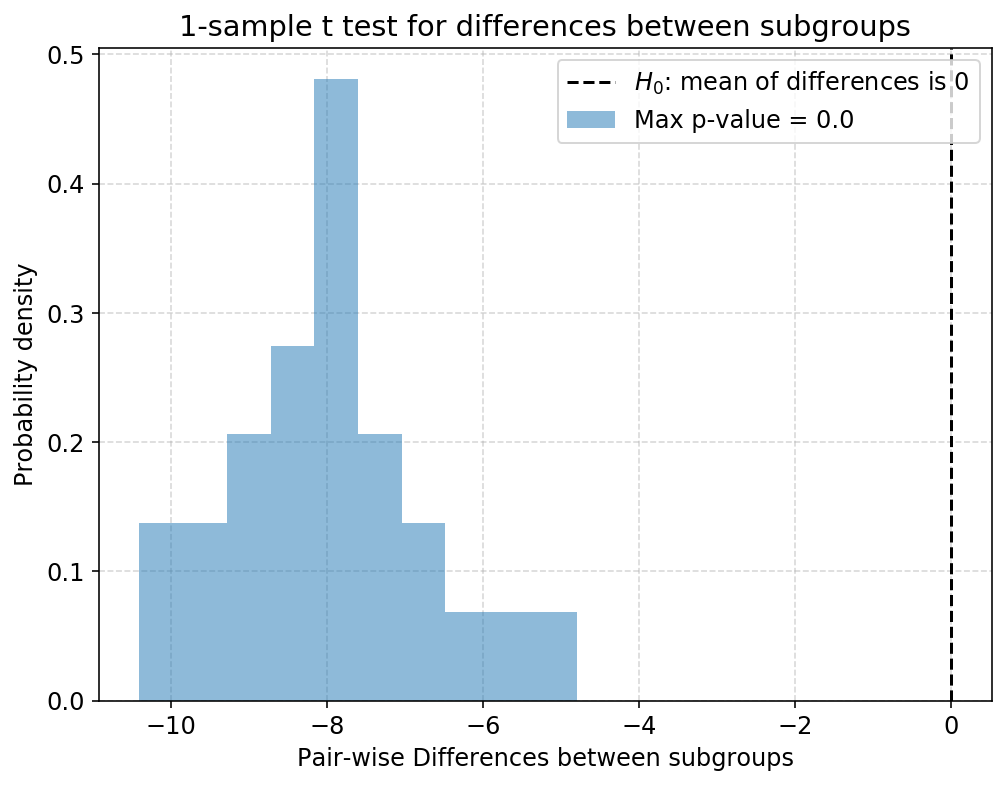

In [16]:
make_plot_by_group('By Sex')

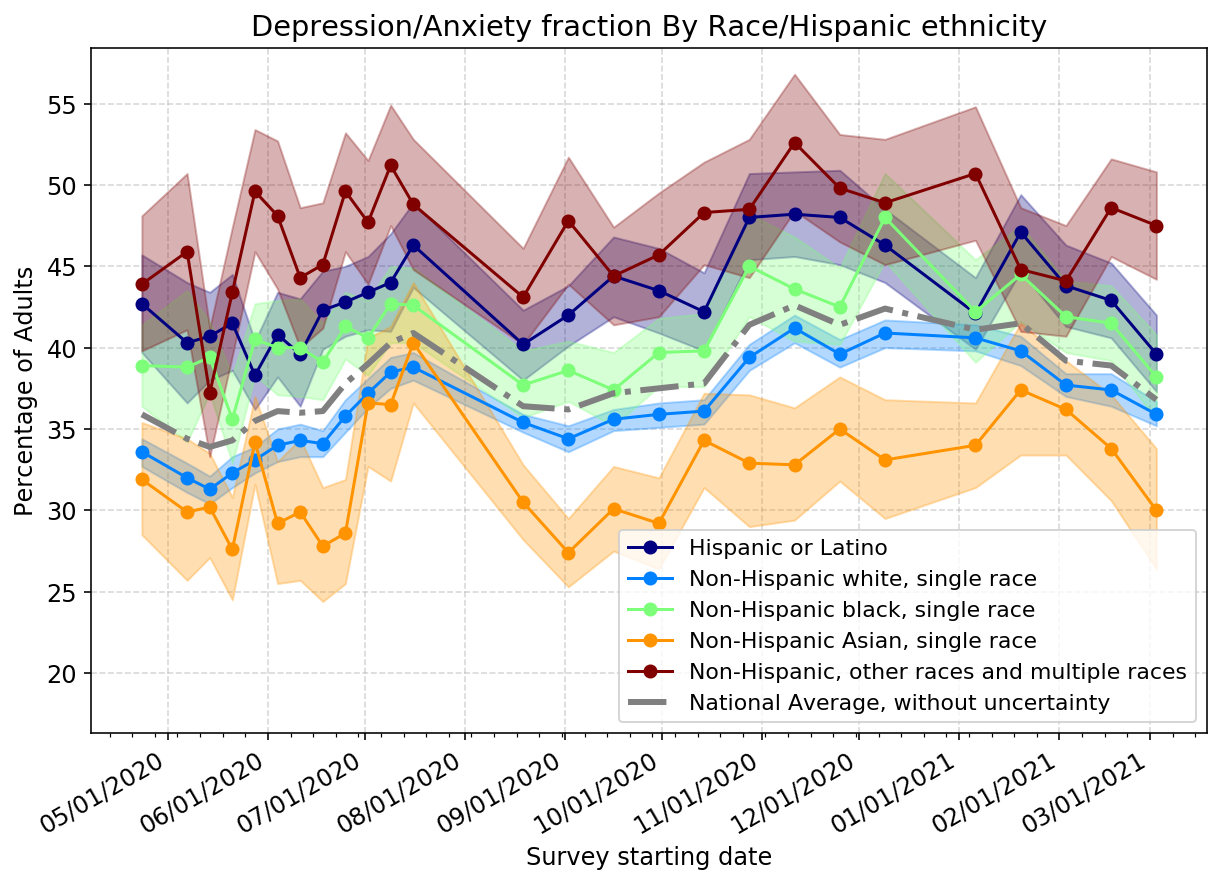

Most un-separated categories:  Hispanic or Latino and Non-Hispanic black, single race


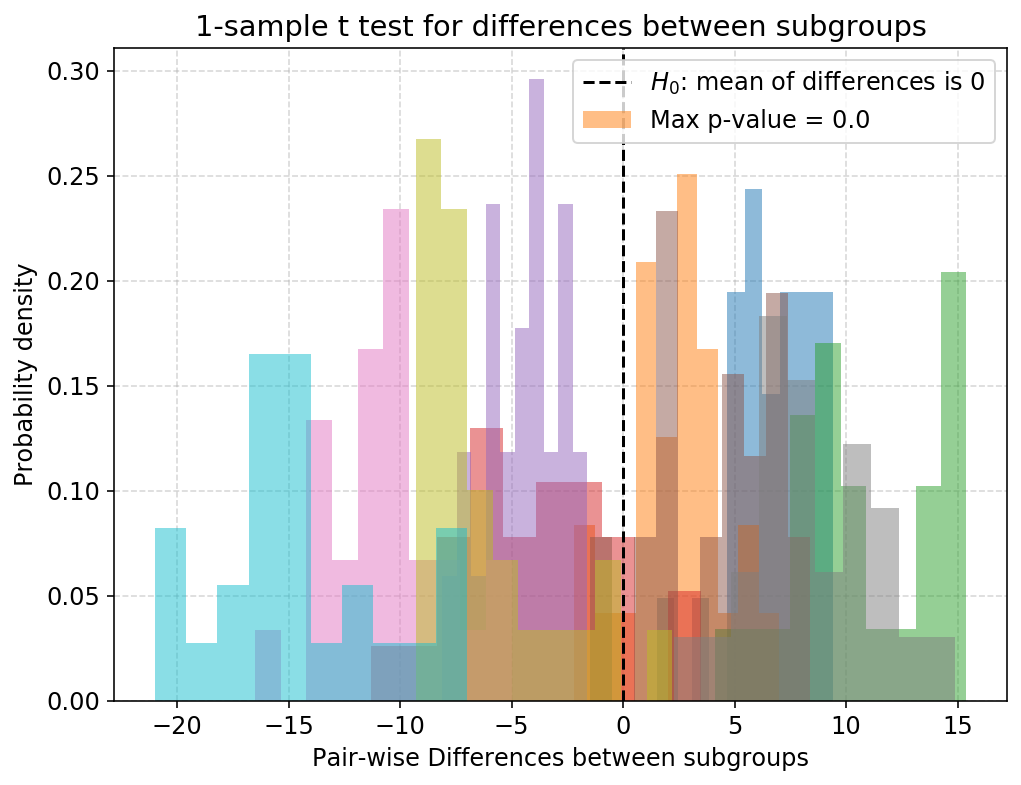

In [17]:
make_plot_by_group('By Race/Hispanic ethnicity')

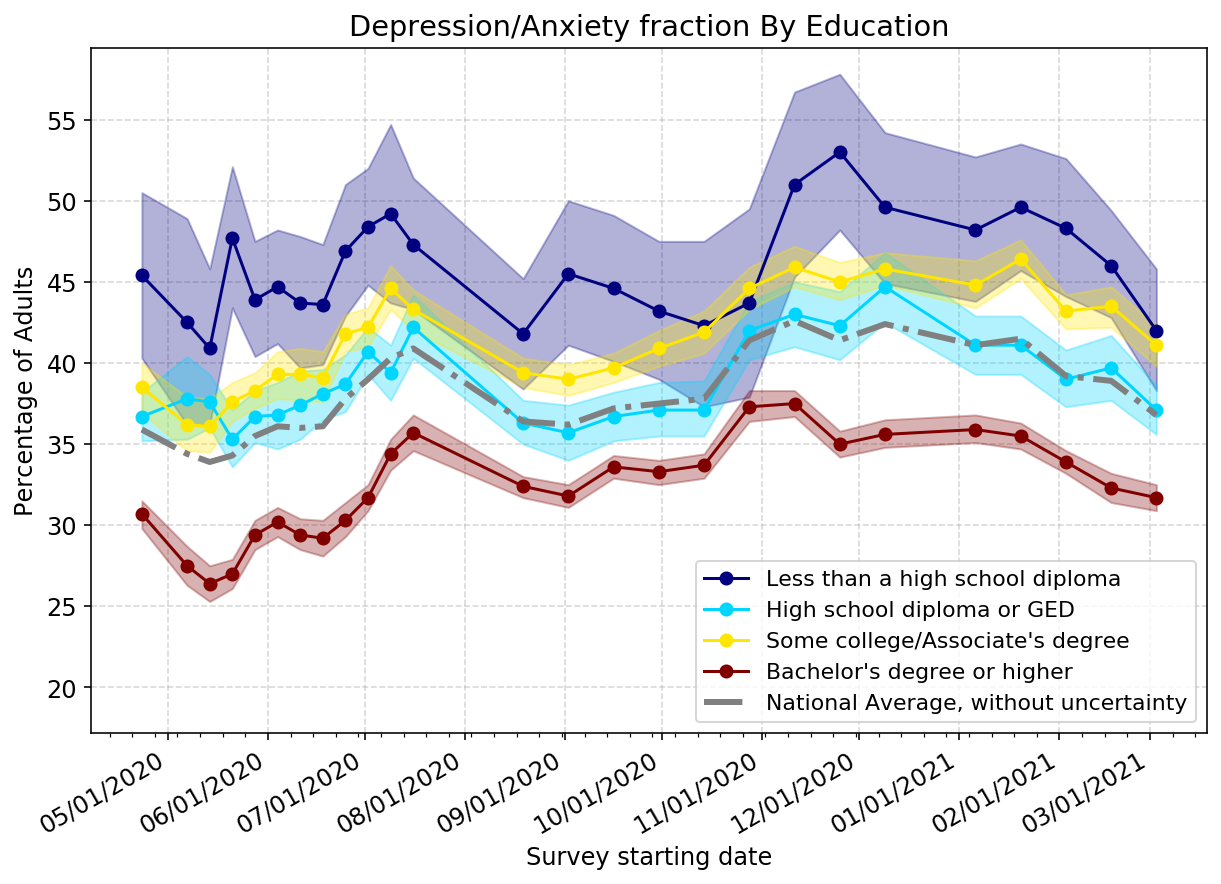

Most un-separated categories:  High school diploma or GED and Some college/Associate's degree


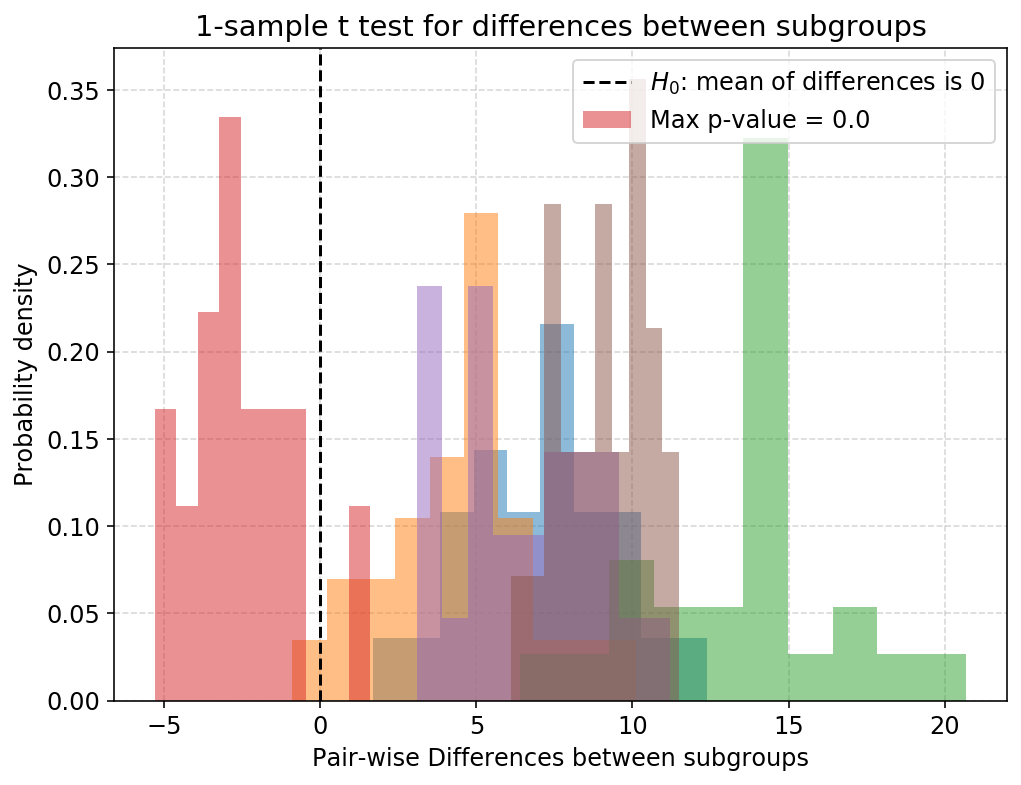

In [18]:
make_plot_by_group('By Education')

## 2. data_mental_hc

In [65]:
print(data_mental_hc.keys())
print(data_mental_hc['Indicator'].unique())
print(data_mental_hc['Group'].unique())
print(data_mental_hc['Subgroup'].unique())

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'LowCI', 'HighCI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag', 'start date'],
      dtype='object')
['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State']
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female'
 'Did not experience symptoms of anxiety/depression in the past 4 weeks'
 'Experienced symptoms of anxiety/depression in past 4 wee

In [66]:
def fillnan(data): # fill null by -999 
    data = data.copy()
    # fill nan
    data = data.fillna(-999)
    # remove empty week
    data = data.drop(data[data['Phase']=='-1'].index)
    # reformat start date
    data['start date'] = data['Time Period Start Date'].str.split(' 12', expand=True)[0]
    
    return data
data_mental_hc = fillnan(data_mental_hc)
data_mental_hc.head()

Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period Time Period Label  \
0  United States  United States     2           13   Aug 19 - Aug 31   
1  United States  18 - 29 years     2           13   Aug 19 - Aug 31   
2  United States  30 - 39 years     2           13   Aug 19 - Aug 31   
3  United States  40 - 49 years     2           13   Aug 19 - Aug 31   
4  United States  50 - 59 years     2           13   Aug 19 - Aug 31   

   Time Period Start Date    Time Period End Date  Value  LowCI  HighCI  \
0  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   19.4   19.0    19.8   
1  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   18.7   17.2    20.3   
2  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   18.3   17.3    19.2   
3  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   20.4   19.5    21.3   
4  08/19/2020 12:00:00 AM  08/31/2020 12:00:00 AM   21.2   20.2    22.2   

  Confidence Interval Quartile Range  Suppression Flag  start date  
0         19.0 - 19.8           -999            -999.0  08/19/2020  
1         17.2 - 20.3           -999            -999.0  08/19/2020  
2         17.3 - 19.2           -999            -999.0  08/19/2020  
3         19.5 - 21.3           -999            -999.0  08/19/2020  
4         20.2 - 22.2           -999            -999.0  08/19/2020

In [67]:
def get_val(indicator, group, subgroup):
    cut1 = (data_mental_hc['Indicator'] == indicator)
    cut2 = (data_mental_hc['Group'] == group)
    cut3 = (data_mental_hc['Subgroup'] == subgroup)

    df = data_mental_hc.loc[cut1 & cut2 & cut3]
    vals = df['Value'].values
    upper = df['HighCI'].values
    lower = df['LowCI'].values
    time = df['Time Period'].values
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').values
    
    return time, date, vals, lower, upper

In [68]:
time_presc, date_presc, val_presc, lower_presc, upper_presc = get_val('Took Prescription Medication for Mental Health, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')
time_therapy, date_therapy, val_therapy, lower_therapy, upper_therapy = get_val('Received Counseling or Therapy, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')
time_any, date_any, val_any, lower_any, upper_any = get_val('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')
time_none, date_none, val_none, lower_none, upper_none = get_val('Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')

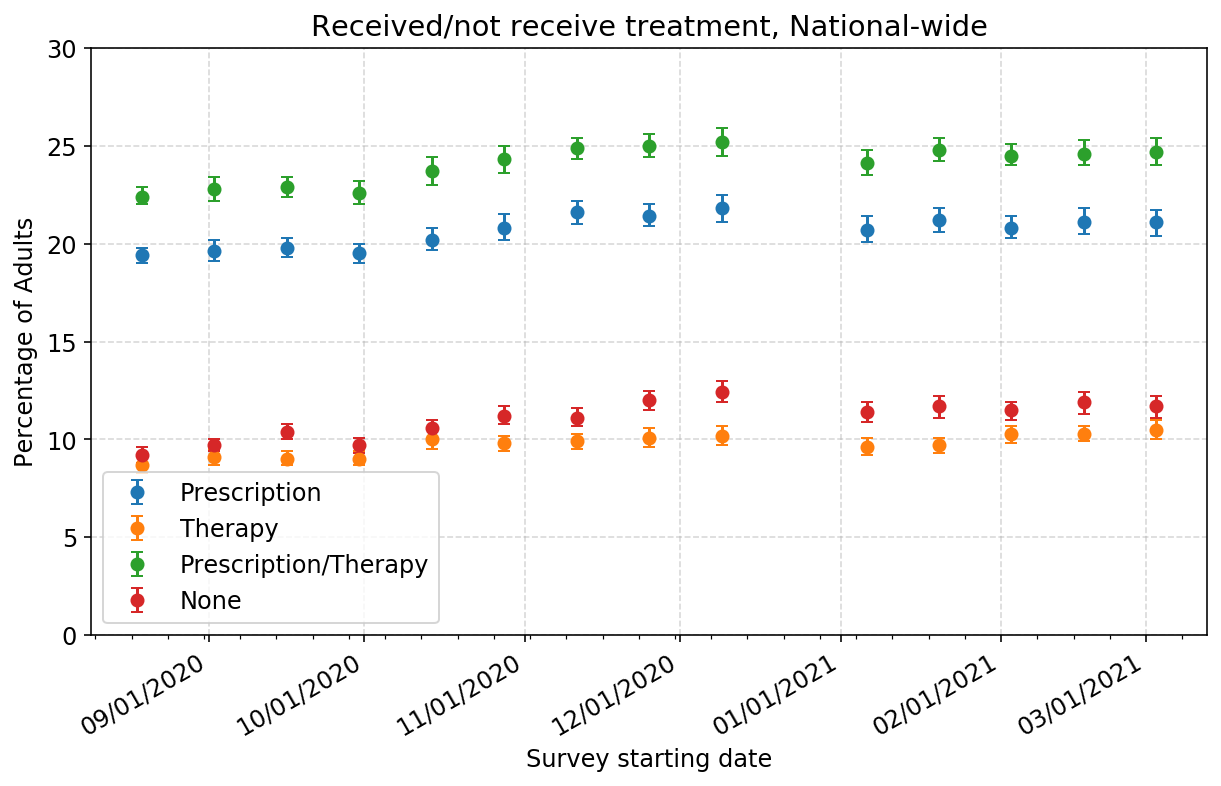

In [69]:
plt.figure(figsize=(10,6))

plt.errorbar(date_presc, val_presc, yerr=[val_presc - lower_presc, upper_presc - val_presc], fmt='o', capsize=3, label='Prescription')
plt.errorbar(date_therapy, val_therapy, yerr=[val_therapy - lower_therapy, upper_therapy - val_therapy], fmt='o', capsize=3, label='Therapy')
plt.errorbar(date_any, val_any, yerr=[val_any - lower_any, upper_any - val_any], fmt='o', capsize=3, label='Prescription/Therapy')
plt.errorbar(date_none, val_none, yerr=[val_none - lower_none, upper_none - val_none], fmt='o', capsize=3, label='None')

plt.title('Received/not receive treatment, National-wide')
plt.xlabel('Survey starting date')
plt.ylabel('Percentage of Adults')
plt.legend(loc='lower left')
plt.ylim(0,30)
plt.grid(linestyle='--', alpha=0.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1, byweekday=MO))

plt.gcf().autofmt_xdate()
plt.show()

In [70]:
def get_val(indicator, group, subgroup):
    cut1 = (data_mental_hc['Indicator'] == indicator)
    cut2 = (data_mental_hc['Group'] == group)
    cut3 = (data_mental_hc['Subgroup'] == subgroup)

    df = data_mental_hc.loc[cut1 & cut2 & cut3]
    
    vals = df['Value'].values
    upper = df['HighCI'].values
    lower = df['LowCI'].values
    time = df['Time Period'].values
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').values
    
    return vals

In [71]:
val_treated = get_val('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks', 'National Estimate', 'United States')
val_notreat = get_val('Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks', 'National Estimate', 'United States')

std_treated = np.std(val_treated)
std_notreat = np.std(val_notreat)

national_treated = np.mean(val_treated)
national_notreat = np.mean(val_notreat)

In [72]:
def make_boxplot_by_group(by_category, labels):
    plt.figure(figsize=(15,7))
    cmap1 = matplotlib.cm.get_cmap('Blues_r')
    cmap2 = matplotlib.cm.get_cmap('Reds_r')

    subgroups = data_mental_hc.loc[data_mental_hc['Group']==by_category]['Subgroup'].unique()
    cnt = 0.08
    val_subgroups = []
    palette = []
    for subgroup in subgroups:
        val_treated = get_val('Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks', 
                              by_category, 
                              subgroup)
        val_notreat = get_val('Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks',
                              by_category, 
                              subgroup)
        val_subgroups.append(val_treated)
        val_subgroups.append(val_notreat)
        
        palette.append(cmap1(cnt))
        palette.append(cmap2(cnt))
        cnt += 0.9/(len(subgroups)-1)

    plt.axhline(national_treated, linestyle='--', lw=3, color='lightblue', alpha=0.5)
    plt.axhline(national_notreat, linestyle='--', lw=3, color='lightpink', alpha=0.5)
    plt.fill_between(np.arange(-1,len(labels)+1),national_treated-std_treated,national_treated+std_treated,color='lightblue',alpha=0.3,label='Treated, national average')
    plt.fill_between(np.arange(-1,len(labels)+1),national_notreat-std_notreat,national_notreat+std_notreat,color='lightpink',alpha=0.3,label='No treat, national average')

    g = sns.boxplot(x=labels, y=val_subgroups, palette=palette)

    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.xlim(-1,len(labels))
    plt.title('Treated vs. Not Treated Fraction ' + by_category)
    plt.xlabel('Subgroups')
    plt.ylabel('Percentage of Adults')
    val_subgroups = np.array(val_subgroups)
    plt.ylim(np.min(val_subgroups[val_subgroups>0])*0.5,np.max(val_subgroups[val_subgroups>0])*1.1)
    plt.legend()
#     plt.legend(loc='lower right', prop={'size':11})
    plt.grid(linestyle='--', alpha=0.5)
    plt.savefig(fig_dir + 'data-mental-hc-' + by_category.split('/')[0].split('By ')[-1] + '.png', dpi=300, bbox='tight')
    plt.show()

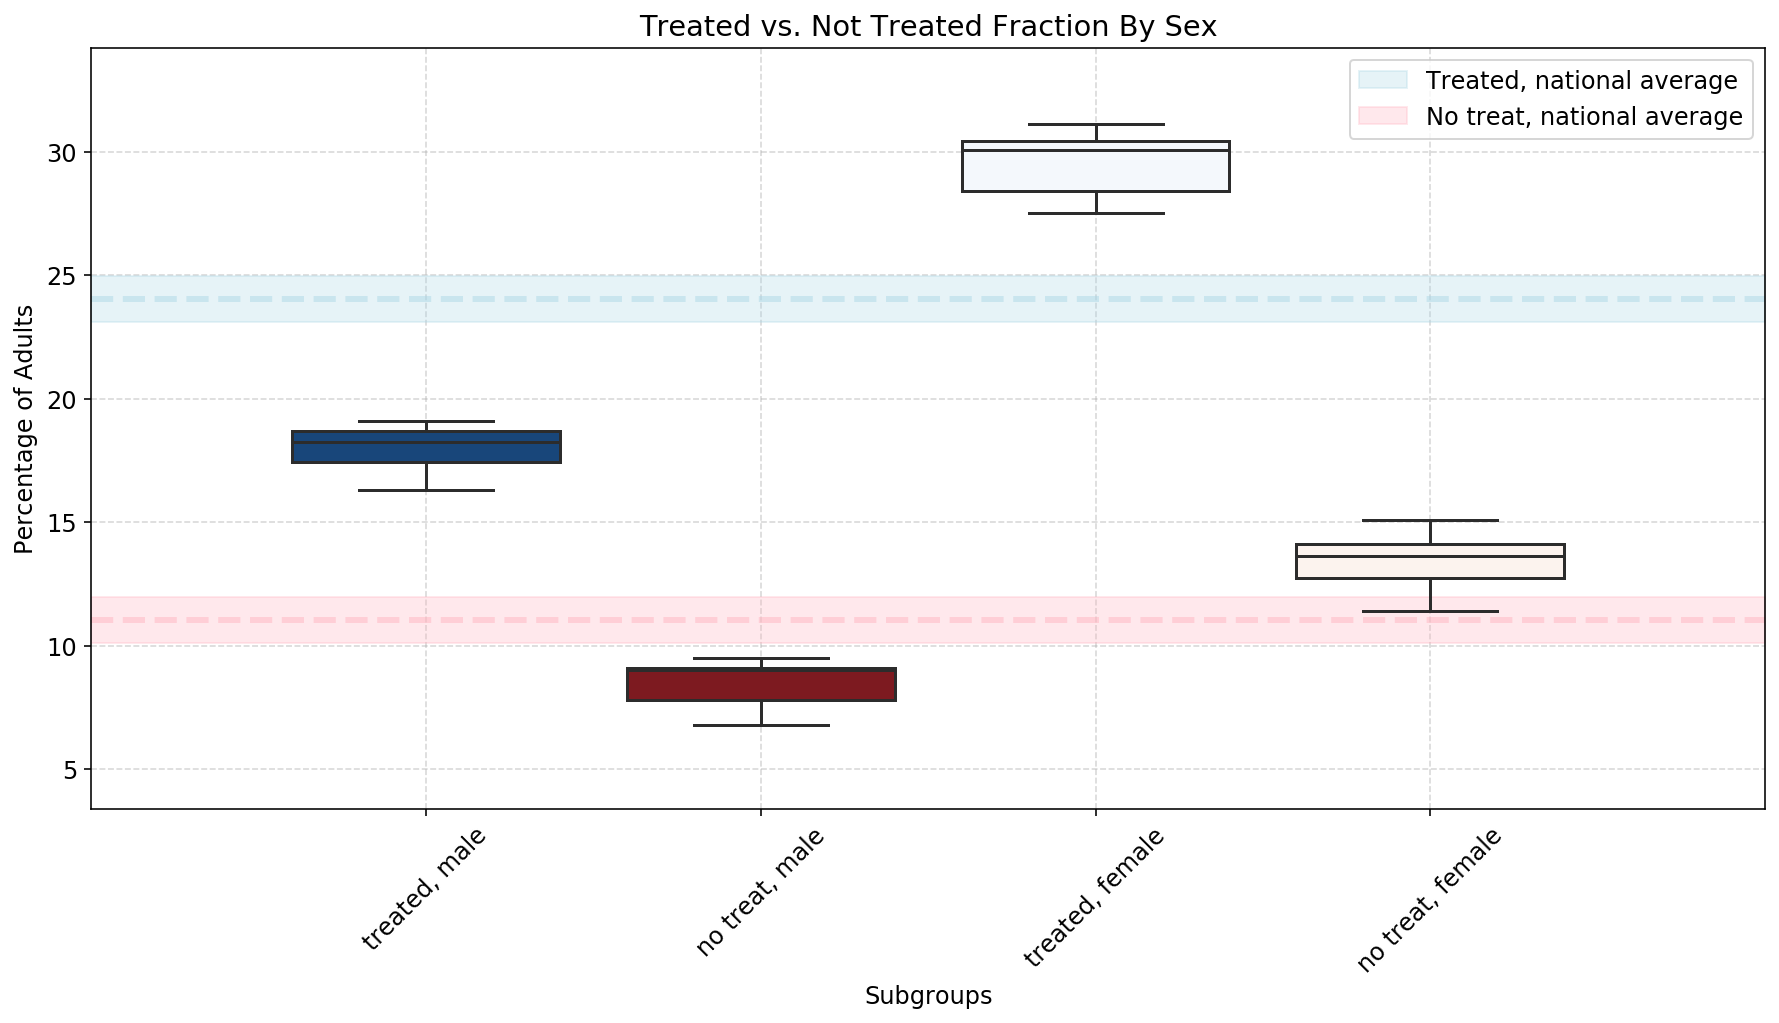

In [73]:
make_boxplot_by_group('By Sex', ['treated, male', 
                                 'no treat, male', 
                                 'treated, female', 
                                 'no treat, female'])

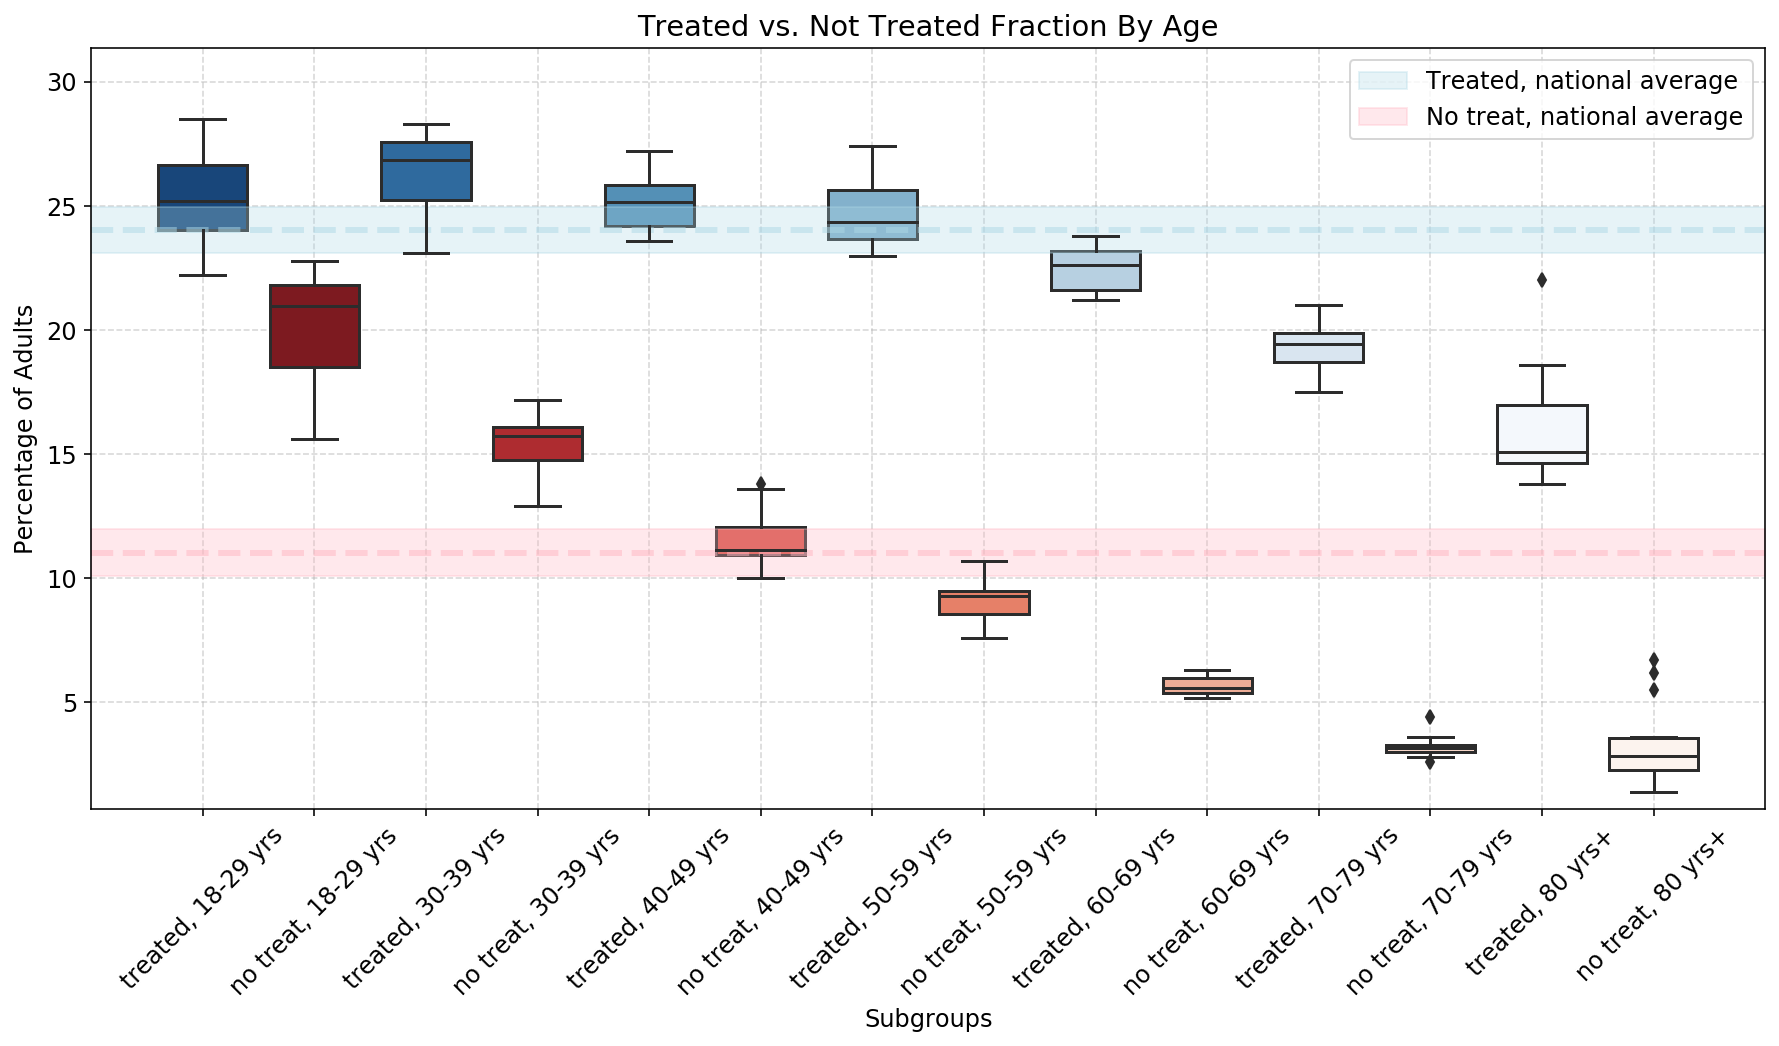

In [74]:
make_boxplot_by_group('By Age', ['treated, 18-29 yrs',
                                'no treat, 18-29 yrs',
                                'treated, 30-39 yrs',
                                'no treat, 30-39 yrs',
                                'treated, 40-49 yrs',
                                'no treat, 40-49 yrs',
                                'treated, 50-59 yrs' ,
                                'no treat, 50-59 yrs' ,
                                'treated, 60-69 yrs' ,
                                'no treat, 60-69 yrs' ,
                                'treated, 70-79 yrs',
                                'no treat, 70-79 yrs',
                                'treated, 80 yrs+',
                                'no treat, 80 yrs+',])

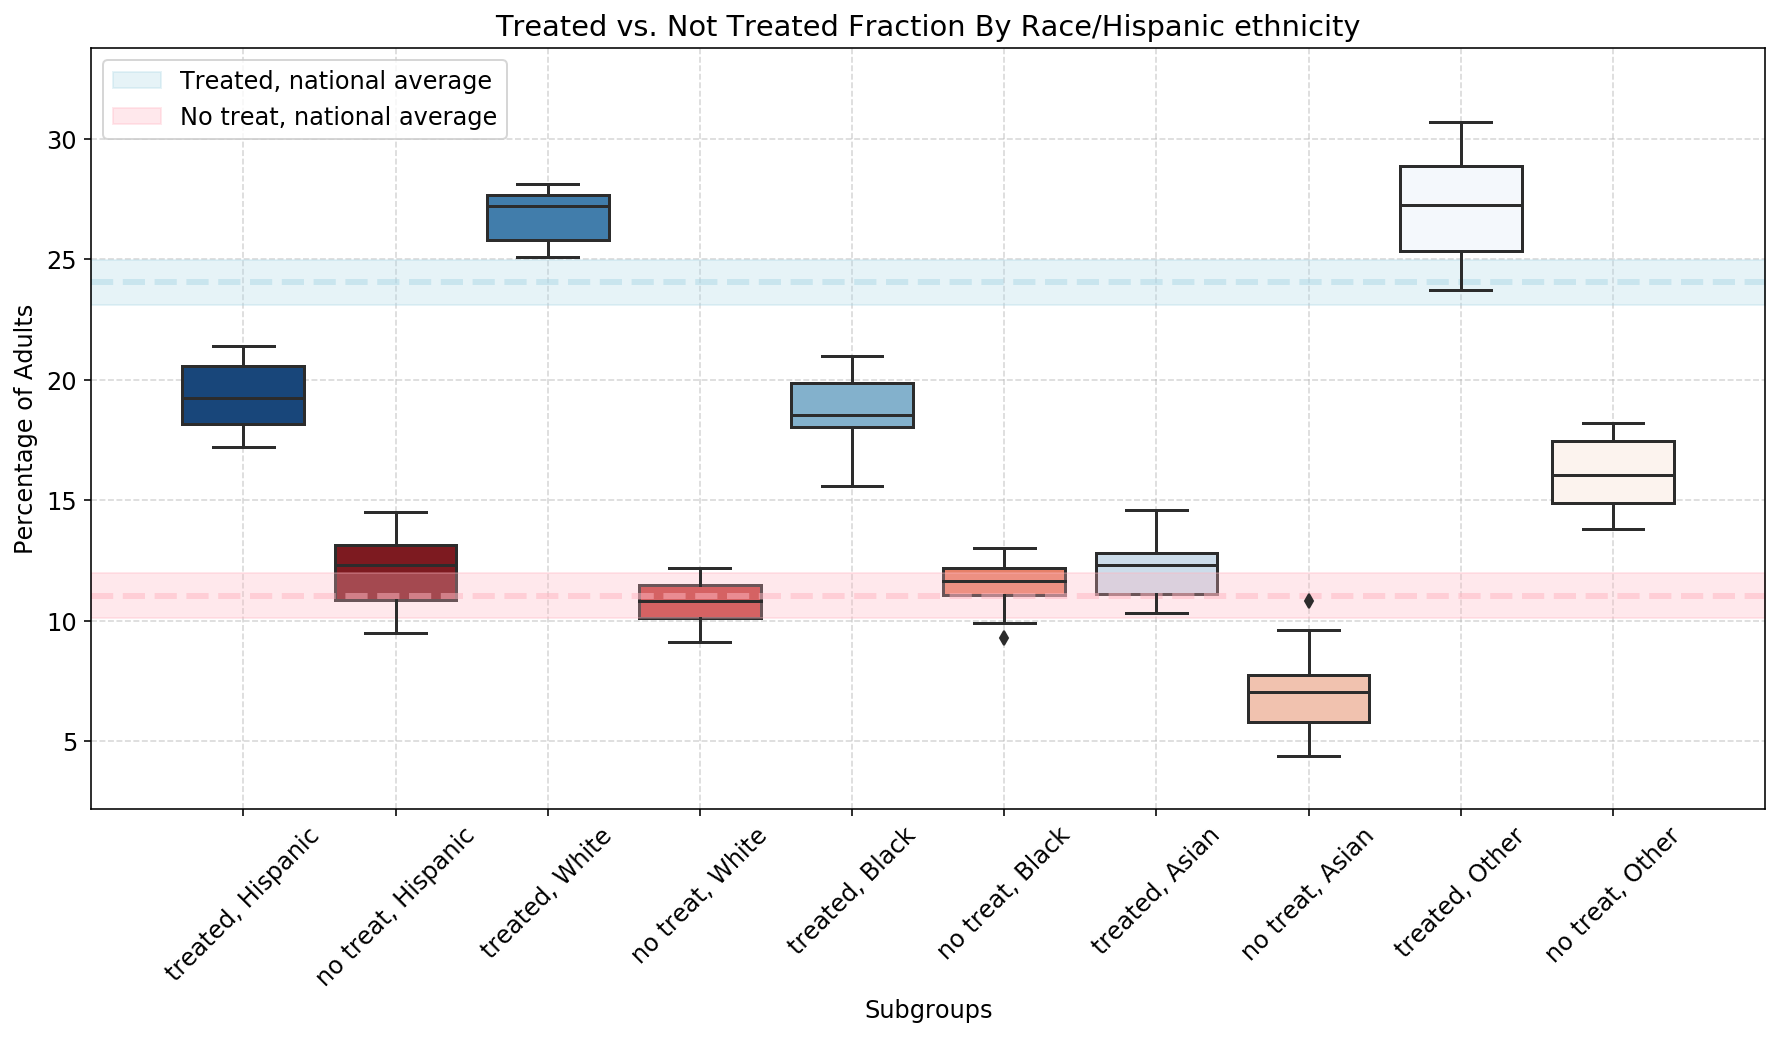

In [75]:
make_boxplot_by_group('By Race/Hispanic ethnicity', ['treated, Hispanic',
                                                    'no treat, Hispanic',
                                                    'treated, White',
                                                    'no treat, White',
                                                    'treated, Black' ,
                                                    'no treat, Black' ,
                                                    'treated, Asian',
                                                    'no treat, Asian',
                                                    'treated, Other',
                                                    'no treat, Other'])

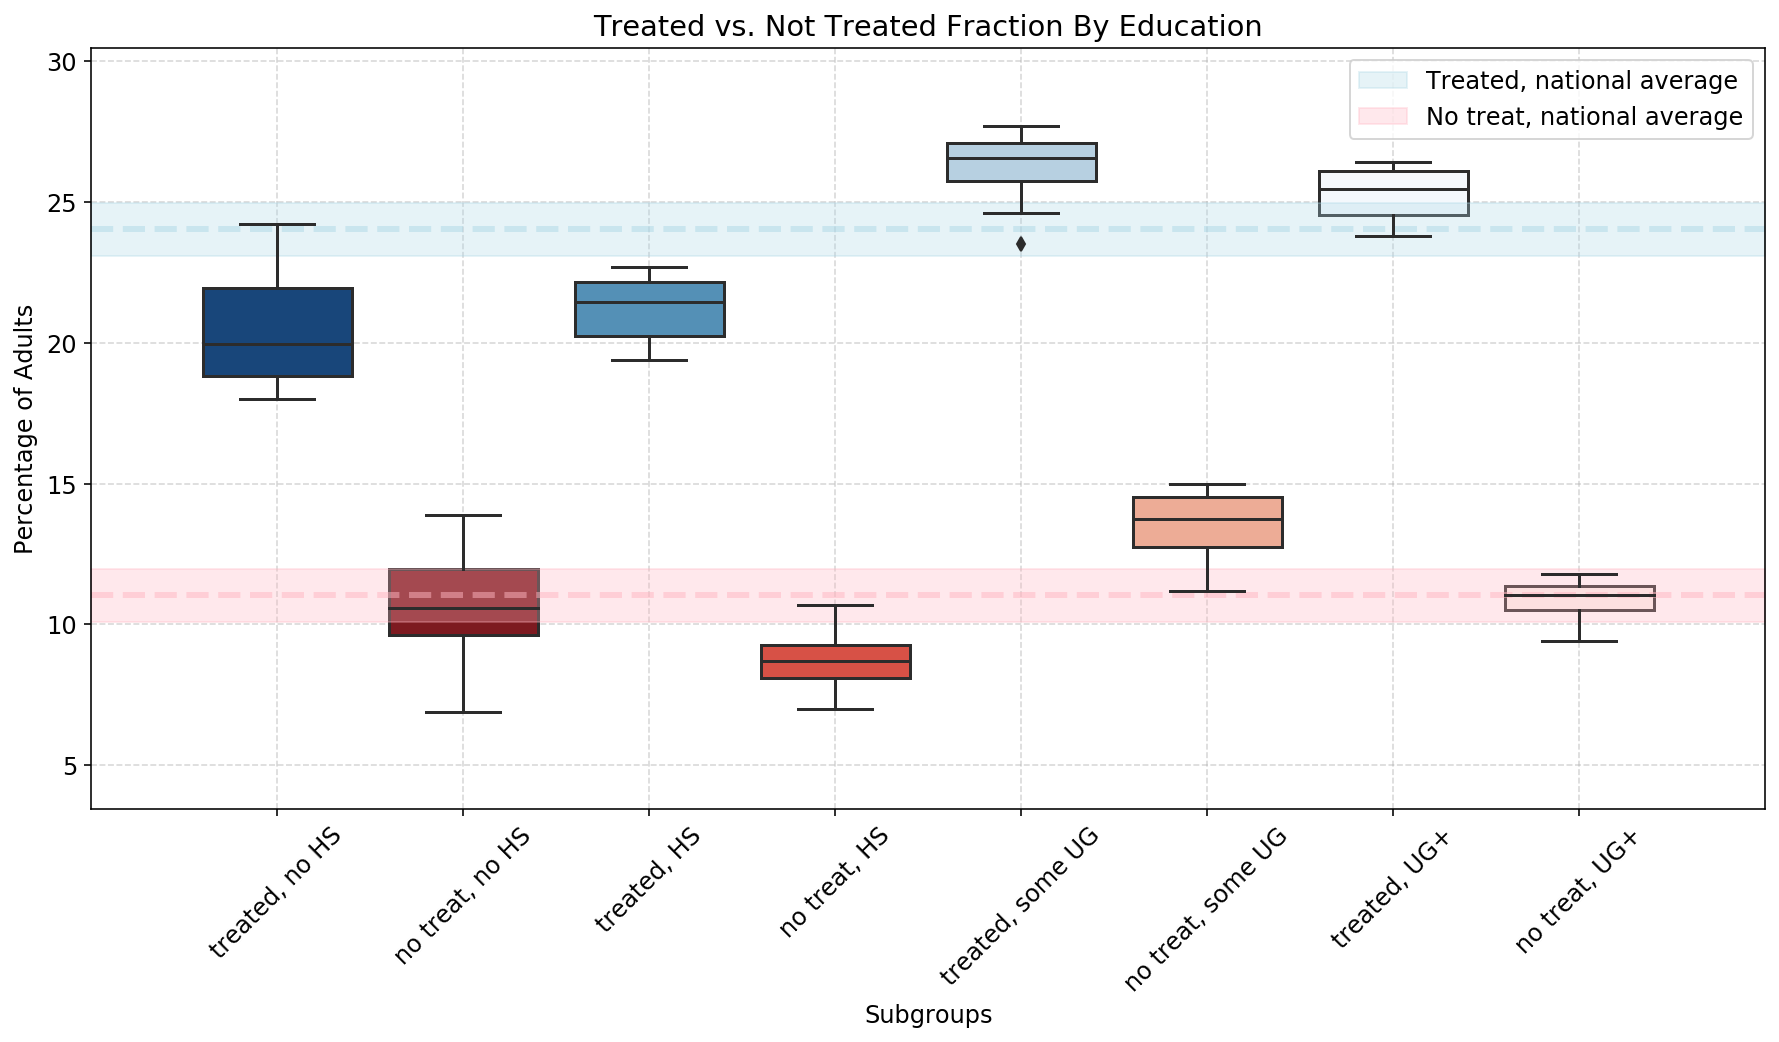

In [76]:
make_boxplot_by_group('By Education', ['treated, no HS', 
                                        'no treat, no HS', 
                                        'treated, HS',
                                        'no treat, HS',
                                        "treated, some UG", 
                                        "no treat, some UG", 
                                        "treated, UG+",
                                        "no treat, UG+",])

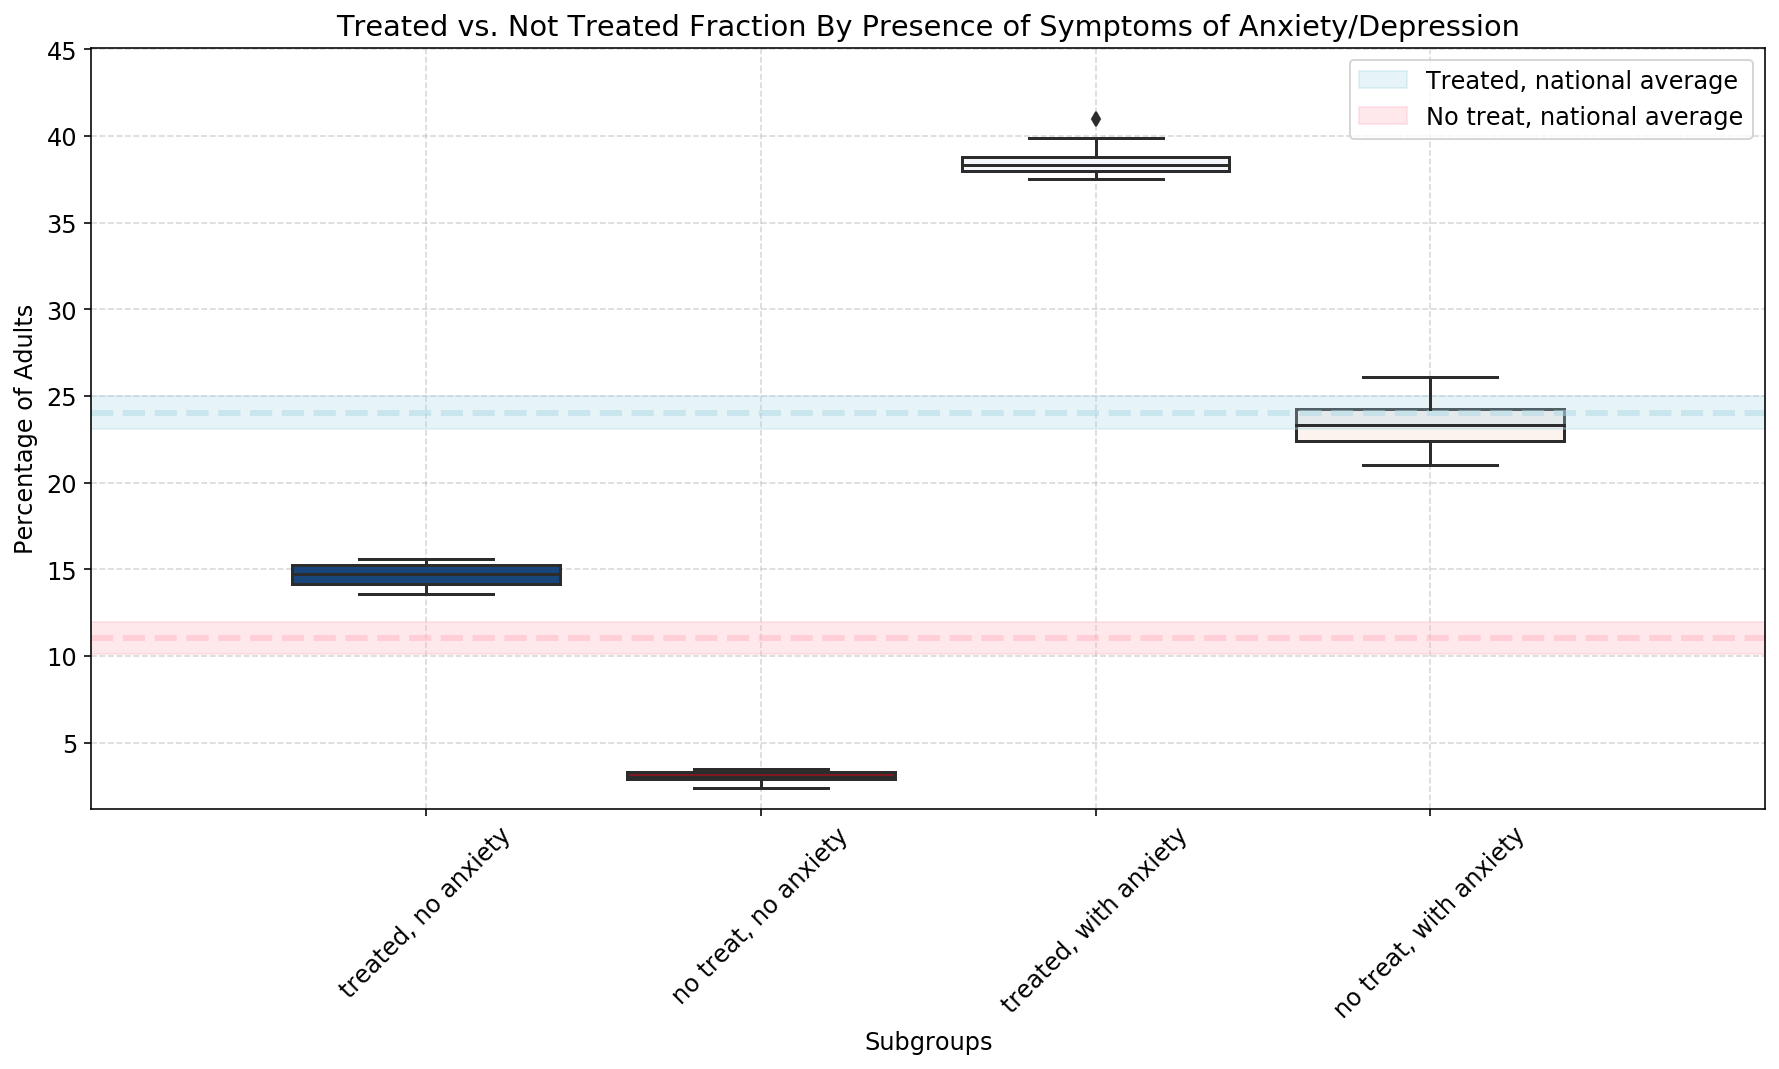

In [77]:
make_boxplot_by_group('By Presence of Symptoms of Anxiety/Depression', ['treated, no anxiety',
                                                                       'no treat, no anxiety',
                                                                       'treated, with anxiety',
                                                                       'no treat, with anxiety'])

## 2.5 Examine correlations between anxiety and treatement fractions

In [112]:
def get_paired_val(group, subgroup):
    
    cut1 = (data_depression['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')
    cut2 = (data_depression['Group'] == group)
    cut3 = (data_depression['Subgroup'] == subgroup)
    cut4 = (data_depression['Time Period'] >= 13) # the mental health data is only taken after period 13. 
    df = data_depression.loc[cut1 & cut2 & cut3 & cut4]
    vals_dep = df['Value'].values
    
    cut1 = (data_mental_hc['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks')
    cut2 = (data_mental_hc['Group'] == group)
    cut3 = (data_mental_hc['Subgroup'] == subgroup)

    df = data_mental_hc.loc[cut1 & cut2 & cut3]
    vals_treated = df['Value'].values
    
    return vals_dep, vals_treated

In [113]:
# get national average
nationa_dep, national_treated = get_paired_val('National Estimate', 'United States')

In [119]:
def make_scatterplot_by_group(by_category):
    plt.figure(figsize=(6,6))
    cmap = matplotlib.cm.get_cmap('rainbow')

    subgroups = data_mental_hc.loc[data_mental_hc['Group']==by_category]['Subgroup'].unique()
    cnt = 0.08
    for subgroup in subgroups:
        val_dep, val_treated = get_paired_val(by_category, subgroup)
        
        val_dep = val_dep[val_treated>0]
        val_treated = val_treated[val_treated>0]
        
        x = np.mean(val_dep)
        y = np.mean(val_treated)
        std_x = np.std(val_dep)
        std_y = np.std(val_treated)
        
        xerr=std_x
        yerr=std_y

        plt.errorbar(x,y,fmt='D',xerr=std_x,yerr=std_y,ms=10,label=subgroup+', k={}'.format(np.round(y/x,2)),color=cmap(cnt))
        cnt += 0.9/(len(subgroups)-1)
        
    plt.errorbar(np.mean(nationa_dep),np.mean(national_treated),fmt='x',
                 xerr=np.std(nationa_dep),yerr=np.std(national_treated),ms=10,label='National Average, k={}'.format(np.round(np.mean(national_treated)/np.mean(nationa_dep),2)),color='grey')
    t = np.arange(0,60,0.1)
    plt.plot(t,t,'--',color='grey',alpha=0.6,label='Equal fraction line')
    plt.title('Depression/Anxiety vs. Treatment Fraction ' + by_category)
    plt.xlabel('Depression/Anxiety fraction')
    plt.ylabel('Received counseling/therapy fraction')
    plt.legend(prop={'size':10}, loc='upper left')
    plt.xlim(10,60)
    plt.ylim(0,50)
#     plt.legend(loc='lower right', prop={'size':11})
    plt.grid(linestyle='--', alpha=0.5)
    plt.savefig(fig_dir + 'compare-symptom-vs-treatment-fraction-' + by_category.split('/')[0].split('By ')[-1] + '.png', dpi=300, bbox='tight')
    plt.show()

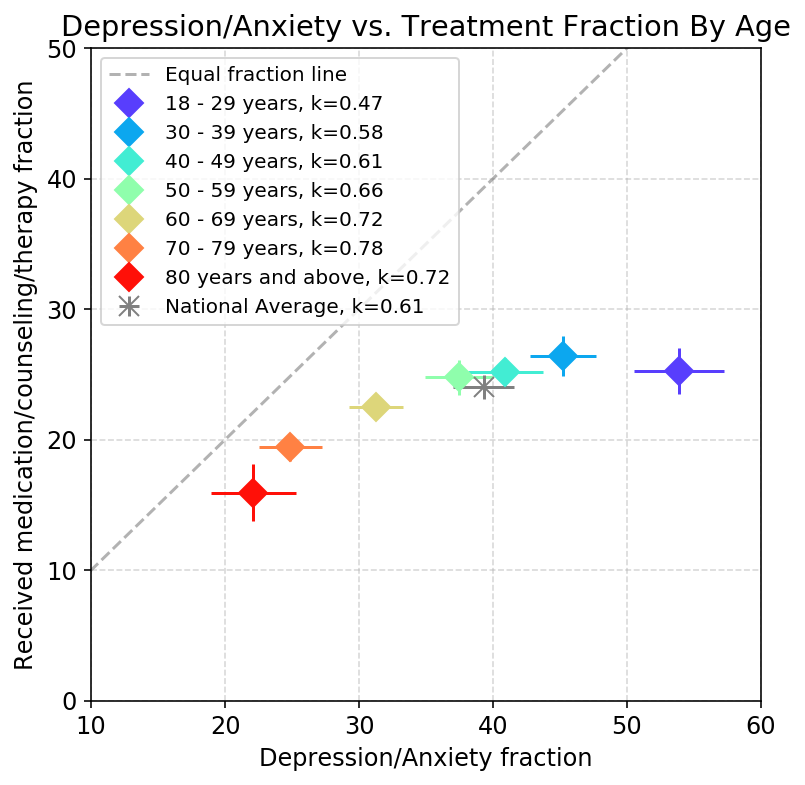

In [120]:
make_scatterplot_by_group('By Age')

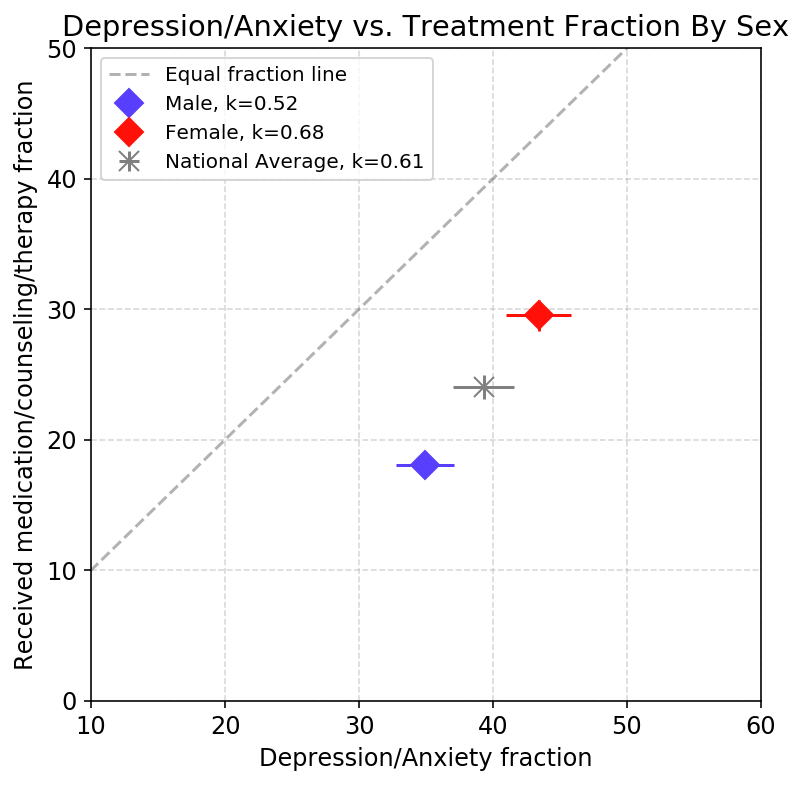

In [121]:
make_scatterplot_by_group('By Sex')

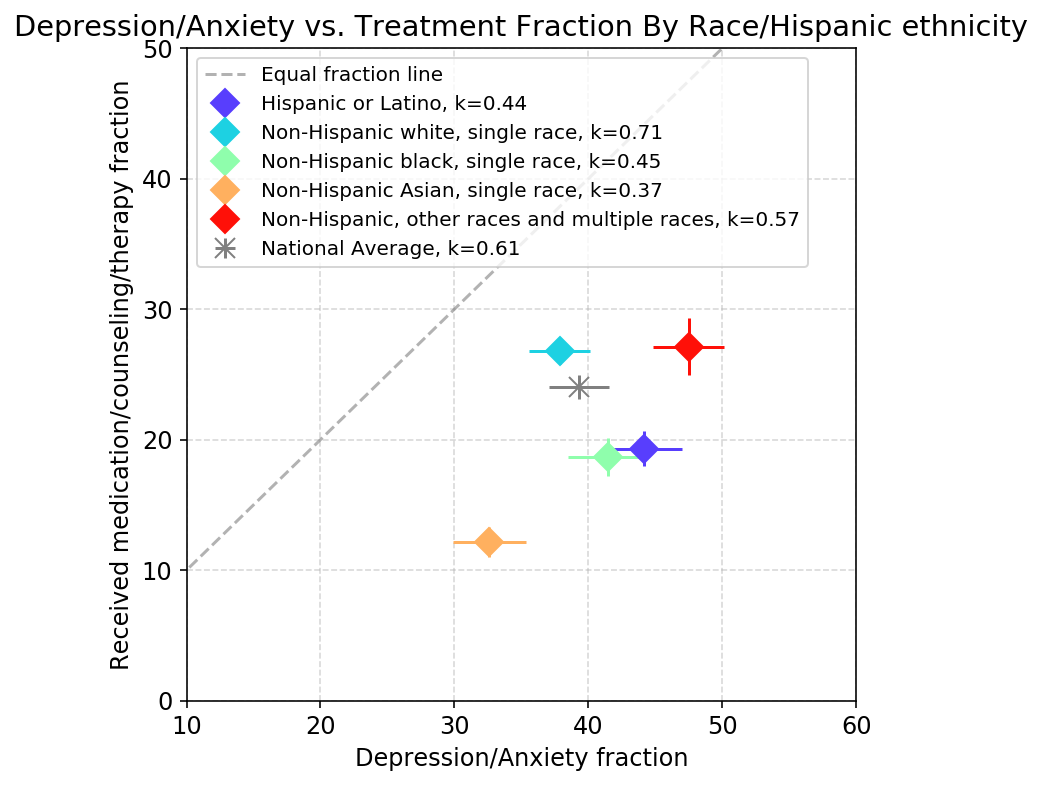

In [122]:
make_scatterplot_by_group('By Race/Hispanic ethnicity')

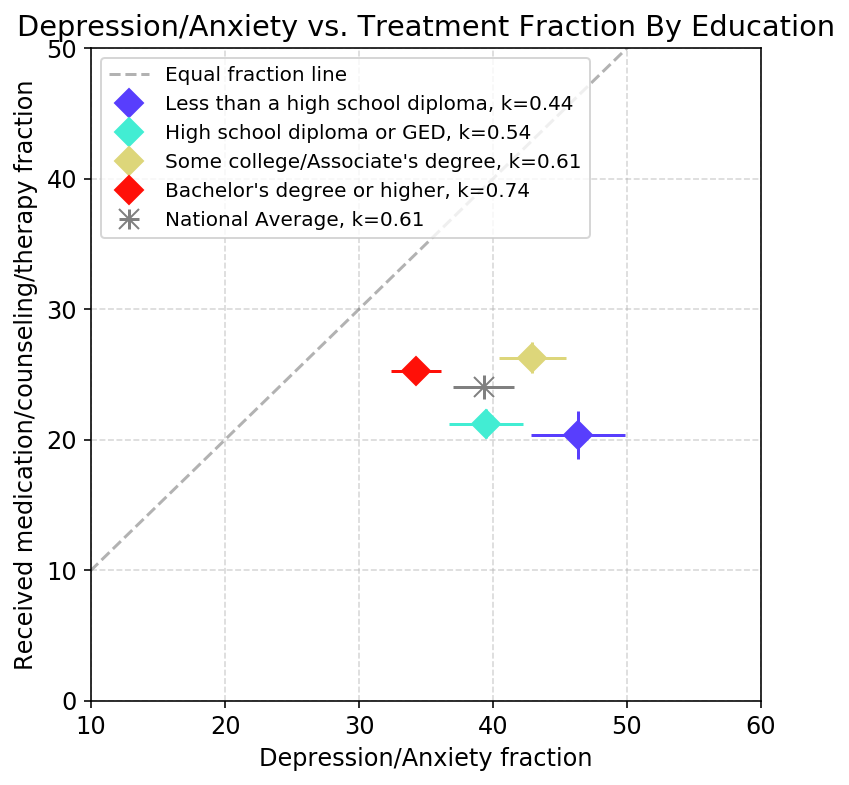

In [123]:
make_scatterplot_by_group('By Education')

In [124]:
def get_paired_val(group, subgroup):
    
    cut1 = (data_depression['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')
    cut2 = (data_depression['Group'] == group)
    cut3 = (data_depression['Subgroup'] == subgroup)
    cut4 = (data_depression['Time Period'] >= 13) # the mental health data is only taken after period 13. 
    df = data_depression.loc[cut1 & cut2 & cut3 & cut4]
    vals_dep = df['Value'].values
    
    cut1 = (data_mental_hc['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks')
    cut2 = (data_mental_hc['Group'] == group)
    cut3 = (data_mental_hc['Subgroup'] == subgroup)

    df = data_mental_hc.loc[cut1 & cut2 & cut3]
    vals_treated = df['Value'].values
    
    return vals_dep, vals_treated

In [125]:
# get national average
nationa_dep, national_treated = get_paired_val('National Estimate', 'United States')

In [132]:
def make_scatterplot_by_group(by_category):
    plt.figure(figsize=(6,6))
    cmap = matplotlib.cm.get_cmap('coolwarm')

    subgroups = data_mental_hc.loc[data_mental_hc['Group']==by_category]['Subgroup'].unique()
    cnt = 0.08
    for subgroup in subgroups:
        val_dep, val_treated = get_paired_val(by_category, subgroup)
        
        val_dep = val_dep[val_treated>0]
        val_treated = val_treated[val_treated>0]
        
        x = np.mean(val_dep)
        y = np.mean(val_treated)
        std_x = np.std(val_dep)
        std_y = np.std(val_treated)
        
        xerr=std_x
        yerr=std_y

        plt.errorbar(x,y,fmt='D',xerr=std_x,yerr=std_y,ms=10,label=subgroup+', k={}'.format(np.round(y/x,2)),color=cmap(cnt))
        cnt += 0.9/(len(subgroups)-1)
        
    plt.errorbar(np.mean(nationa_dep),np.mean(national_treated),fmt='x',
                 xerr=np.std(nationa_dep),yerr=np.std(national_treated),ms=10,label='National Average, k={}'.format(np.round(np.mean(national_treated)/np.mean(nationa_dep),2)),color='grey')
    t = np.arange(0,60,0.1)
    plt.plot(t,t,'--',color='grey',alpha=0.6,label='Equal fraction line')
    plt.title('Depression/Anxiety vs. No Treatment Fraction ' + by_category)
    plt.xlabel('Depression/Anxiety fraction')
    plt.ylabel('Need treatment but did not get fraction')
    plt.legend(prop={'size':10}, loc='upper left')
    plt.xlim(10,60)
    plt.ylim(0,50)
#     plt.legend(loc='lower right', prop={'size':11})
    plt.grid(linestyle='--', alpha=0.5)
    plt.savefig(fig_dir + 'compare-symptom-vs-notreat-fraction-' + by_category.split('/')[0].split('By ')[-1] + '.png', dpi=300, bbox='tight')
    plt.show()

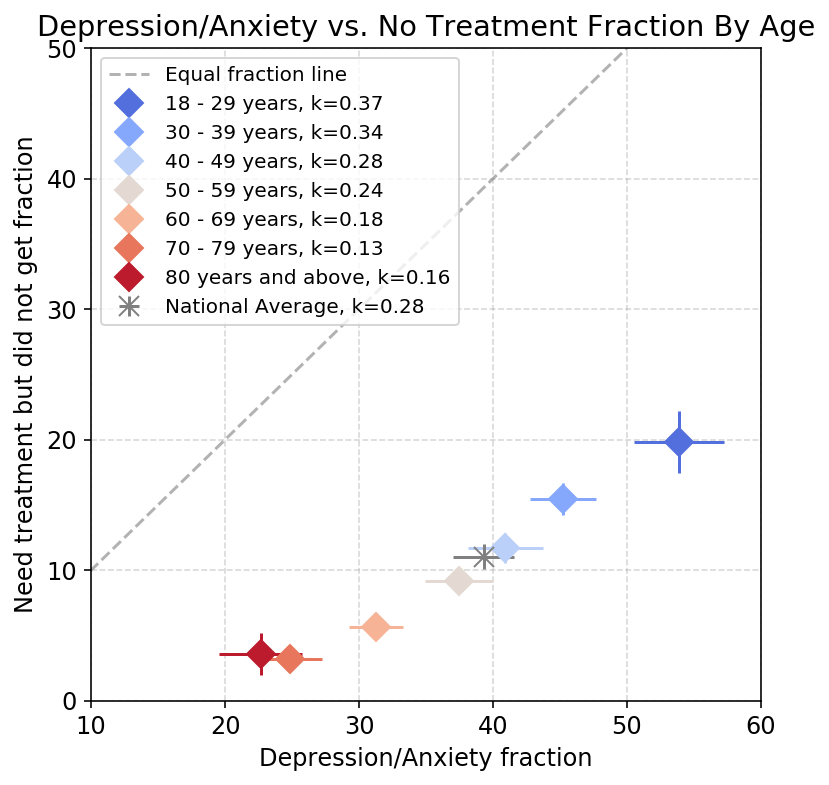

In [133]:
make_scatterplot_by_group('By Age')

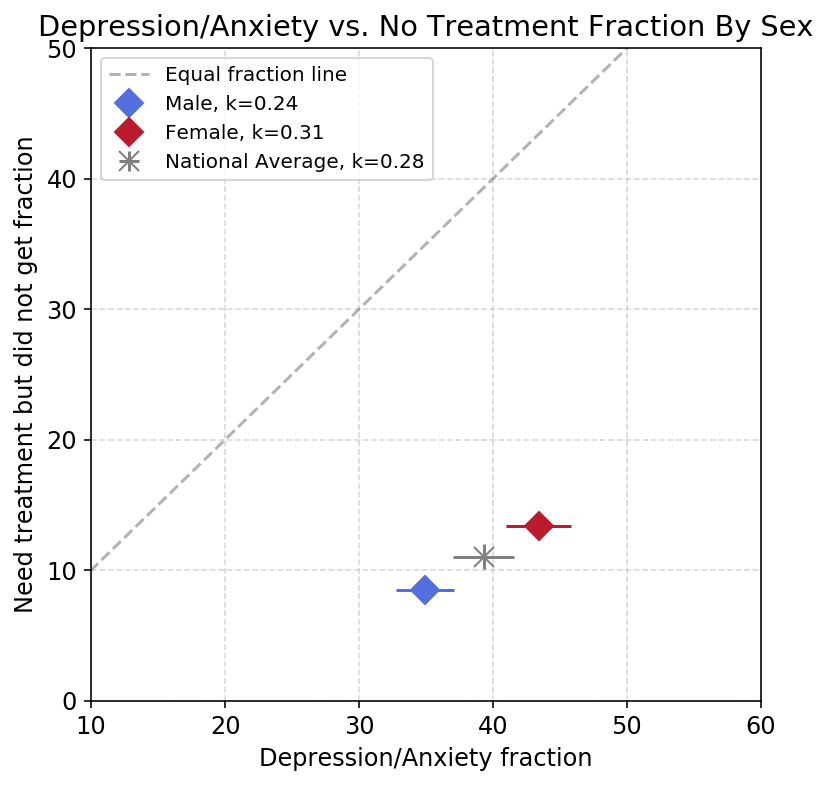

In [134]:
make_scatterplot_by_group('By Sex')

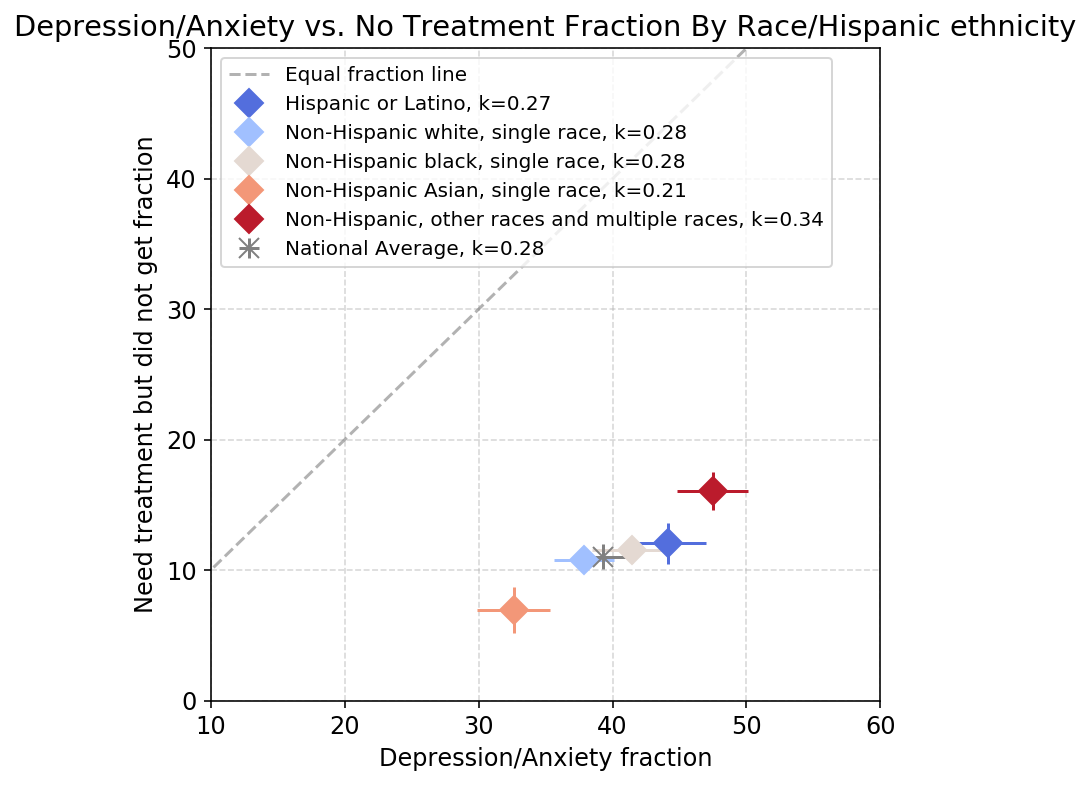

In [135]:
make_scatterplot_by_group('By Race/Hispanic ethnicity')

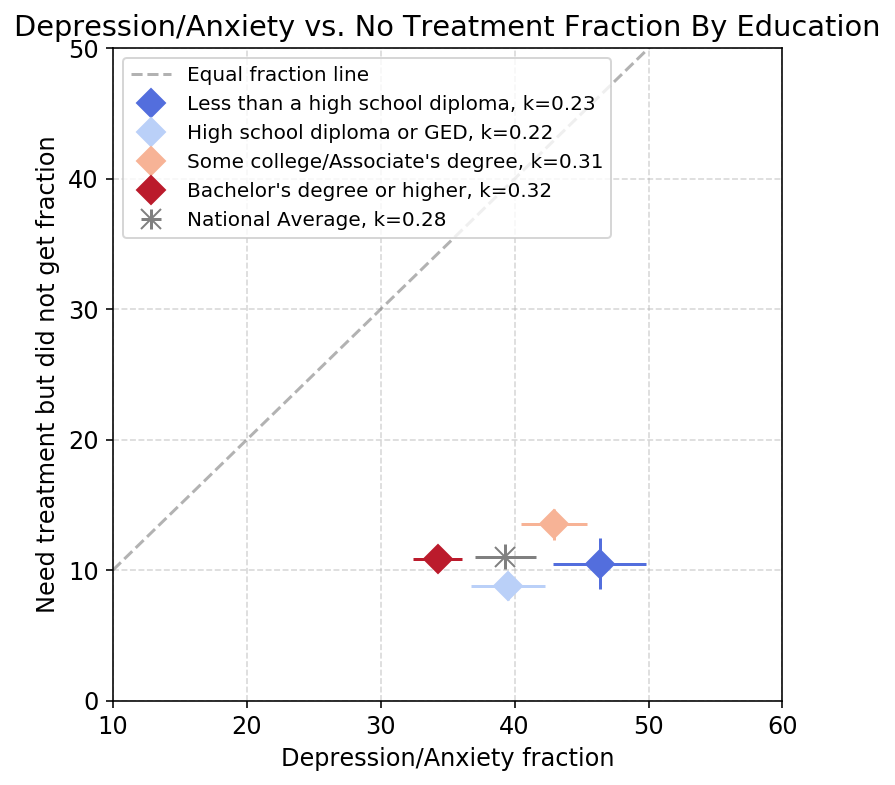

In [136]:
make_scatterplot_by_group('By Education')

# 3. data_reduced_access_hc

In [140]:
print(data_reduce_access_hc.keys())
print(data_reduce_access_hc['Indicator'].unique())
print(data_reduce_access_hc['Group'].unique())
print(data_reduce_access_hc['Subgroup'].unique())

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range',
       'start date'],
      dtype='object')
['Delayed Medical Care, Last 4 Weeks'
 'Did Not Get Needed Care, Last 4 Weeks'
 'Delayed or Did Not Get Care, Last 4 Weeks']
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State']
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female' 'Hispanic or Latino' 'Non-Hispanic white, single race'
 'Non-Hispanic black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California

In [141]:
def fillnan(data): # fill null by -999 
    data = data.copy()
    # fill nan
    data = data.fillna(-999)
    # remove empty week
    data = data.drop(data[data['Phase']=='-1'].index)
    # reformat start date
    data['start date'] = data['Time Period Start Date'].str.split(' 12', expand=True)[0]
    
    return data
data_reduce_access_hc = fillnan(data_reduce_access_hc)
data_reduce_access_hc.head()

Indicator              Group          State  \
0  Delayed Medical Care, Last 4 Weeks  National Estimate  United States   
1  Delayed Medical Care, Last 4 Weeks             By Age  United States   
2  Delayed Medical Care, Last 4 Weeks             By Age  United States   
3  Delayed Medical Care, Last 4 Weeks             By Age  United States   
4  Delayed Medical Care, Last 4 Weeks             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 29 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  30 - 39 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  40 - 49 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  50 - 59 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   38.7    38.1     39.4         38.1 - 39.4   
1  05/05/2020 12:00:00 AM   34.8    32.5     37.2         32.5 - 37.2   
2  05/05/2020 12:00:00 AM   37.3    35.6     39.0         35.6 - 39.0   
3  05/05/2020 12:00:00 AM   40.3    39.0     41.7         39.0 - 41.7   
4  05/05/2020 12:00:00 AM   40.7    39.3     42.2         39.3 - 42.2   

  Quartile Range  start date  
0           -999  04/23/2020  
1           -999  04/23/2020  
2           -999  04/23/2020  
3           -999  04/23/2020  
4           -999  04/23/2020

In [142]:
def get_val(indicator, group, subgroup):
    cut1 = (data_reduce_access_hc['Indicator'] == indicator)
    cut2 = (data_reduce_access_hc['Group'] == group)
    cut3 = (data_reduce_access_hc['Subgroup'] == subgroup)

    df = data_reduce_access_hc.loc[cut1 & cut2 & cut3]
    vals = df['Value'].values
    upper = df['High CI'].values
    lower = df['Low CI'].values
    time = df['Time Period'].values
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').values
    
    return time, date, vals, lower, upper

In [143]:
time_delayed, date_delayed, val_delayed, lower_delayed, upper_delayed = get_val('Delayed Medical Care, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')
time_notget, date_notget, val_notget, lower_notget, upper_notget = get_val('Did Not Get Needed Care, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')
time_none, date_none, val_none, lower_none, upper_none = get_val('Delayed or Did Not Get Care, Last 4 Weeks',
                                                            'National Estimate', 
                                                            'United States')

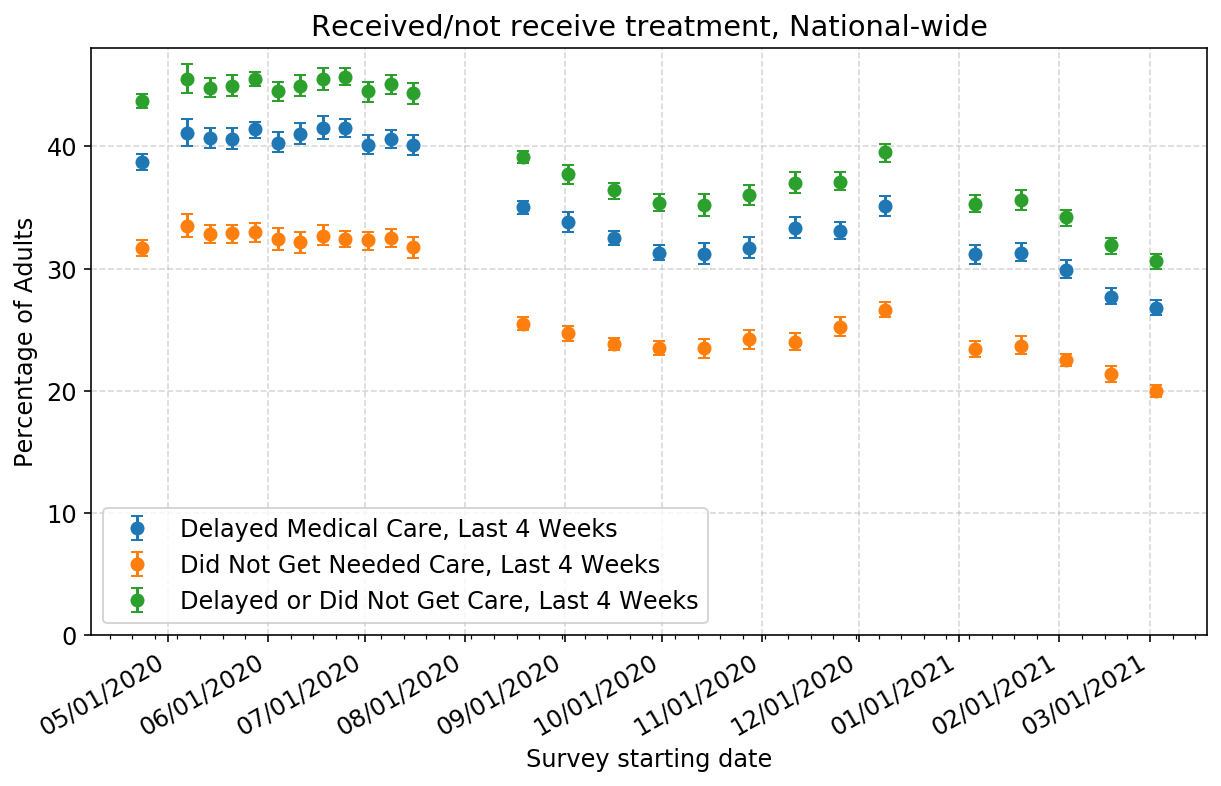

In [163]:
plt.figure(figsize=(10,6))

plt.errorbar(date_delayed, val_delayed, yerr=[val_delayed - lower_delayed, upper_delayed - val_delayed], fmt='o', capsize=3, label='Delayed Medical Care, Last 4 Weeks')
plt.errorbar(date_notget, val_notget, yerr=[val_notget - lower_notget, upper_notget - val_notget], fmt='o', capsize=3, label='Did Not Get Needed Care, Last 4 Weeks')
plt.errorbar(date_none, val_none, yerr=[val_none - lower_none, upper_none - val_none], fmt='o', capsize=3, label='Delayed or Did Not Get Care, Last 4 Weeks')

plt.title('Received/not receive treatment, National-wide')
plt.xlabel('Survey starting date')
plt.ylabel('Percentage of Adults')
plt.legend(loc='lower left')
plt.ylim(0,)
plt.grid(linestyle='--', alpha=0.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1, byweekday=MO))
plt.gcf().autofmt_xdate()
plt.savefig(fig_dir + 'data-nocare-fraction-national-wide.png', dpi=300, bbox='tight')

plt.show()

## 3.5 Examine correlations between anxiety and no care fraction

In [145]:
def get_paired_val(group, subgroup):
    
    cut1 = (data_depression['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')
    cut2 = (data_depression['Group'] == group)
    cut3 = (data_depression['Subgroup'] == subgroup)
    df = data_depression.loc[cut1 & cut2 & cut3]
    vals_dep = df['Value'].values
    
    cut1 = (data_reduce_access_hc['Indicator'] == 'Delayed or Did Not Get Care, Last 4 Weeks')
    cut2 = (data_reduce_access_hc['Group'] == group)
    cut3 = (data_reduce_access_hc['Subgroup'] == subgroup)

    df = data_reduce_access_hc.loc[cut1 & cut2 & cut3]
    vals_nocare = df['Value'].values
    
    return vals_dep, vals_nocare

In [146]:
# get national average
nationa_dep, national_nocare = get_paired_val('National Estimate', 'United States')

In [155]:
def make_scatterplot_by_group(by_category):
    plt.figure(figsize=(6,6))
    cmap = matplotlib.cm.get_cmap('coolwarm')

    subgroups = data_reduce_access_hc.loc[data_reduce_access_hc['Group']==by_category]['Subgroup'].unique()
    cnt = 0.08
    for subgroup in subgroups:
        val_dep, val_treated = get_paired_val(by_category, subgroup)
        
        x = np.mean(val_dep)
        y = np.mean(val_treated)
        std_x = np.std(val_dep)
        std_y = np.std(val_treated)
        
        xerr=std_x
        yerr=std_y

        plt.errorbar(x,y,fmt='D',xerr=std_x,yerr=std_y,ms=10,label=subgroup,color=cmap(cnt))

        cnt += 0.9/(len(subgroups)-1)
        
    plt.errorbar(np.mean(nationa_dep),np.mean(national_nocare),fmt='x',
                 xerr=np.std(nationa_dep),yerr=np.std(national_nocare),ms=10,label='National Average',color='grey')
    t = np.arange(0,60,0.1)
    plt.plot(t,t,'--',color='grey',alpha=0.6,label='Equal fraction line')
    plt.title('Depression/Anxiety vs. Treatment Fraction ' + by_category)
    plt.xlabel('Depression/Anxiety fraction')
    plt.ylabel('Delayed or did not get care')
    plt.legend(prop={'size':10}, loc='upper left')
    plt.xlim(10,60)
    plt.ylim(20,70)
#     plt.legend(loc='lower right', prop={'size':11})
    plt.grid(linestyle='--', alpha=0.5)
    plt.savefig(fig_dir + 'compare-symptom-vs-nocare-fraction-' + by_category.split('/')[0].split('By ')[-1] + '.png', dpi=300, bbox='tight')
    plt.show()

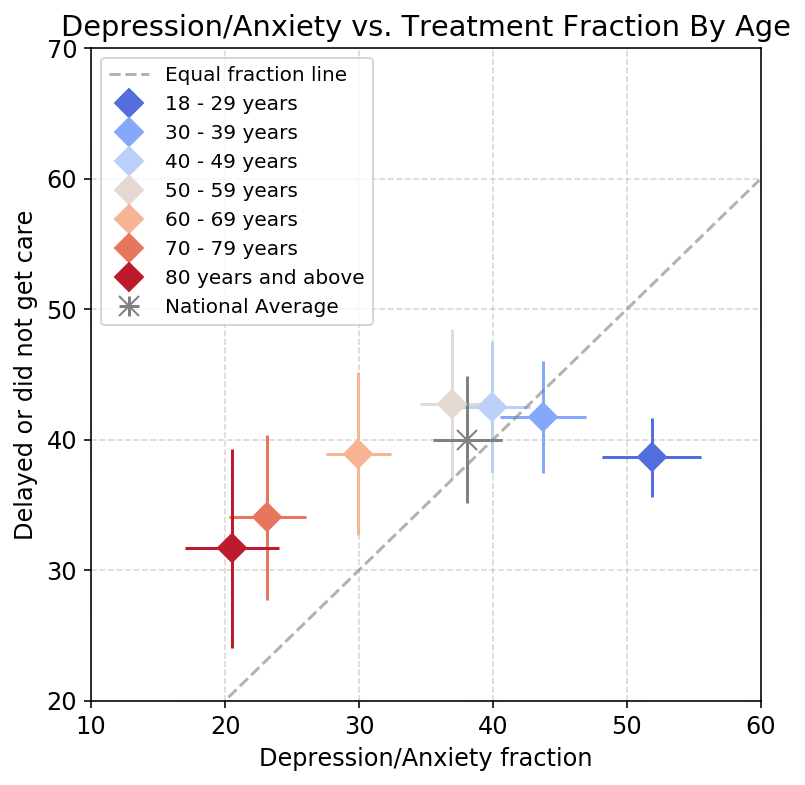

In [156]:
make_scatterplot_by_group('By Age')

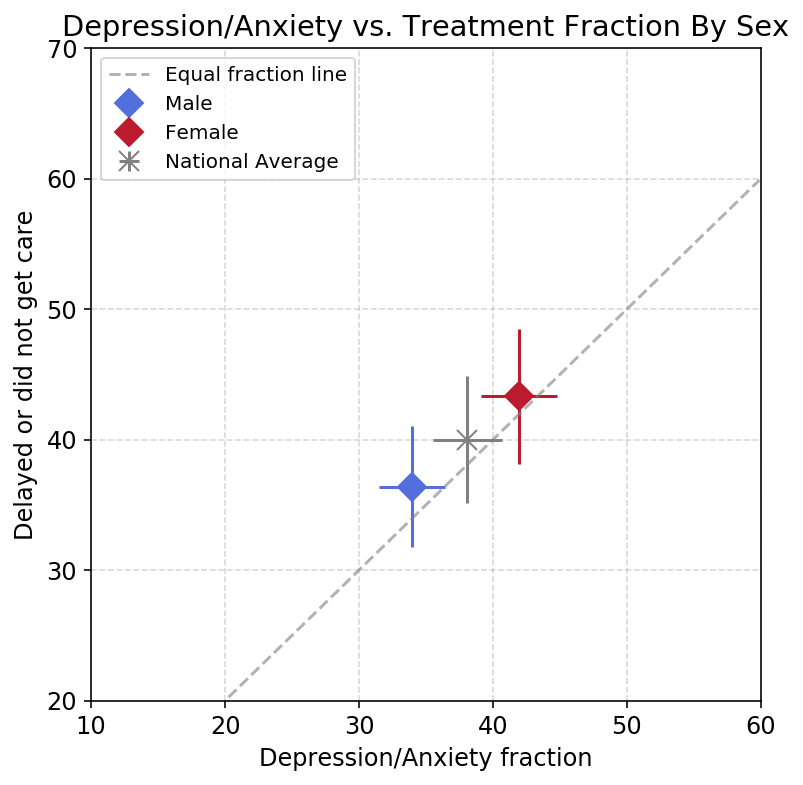

In [157]:
make_scatterplot_by_group('By Sex')

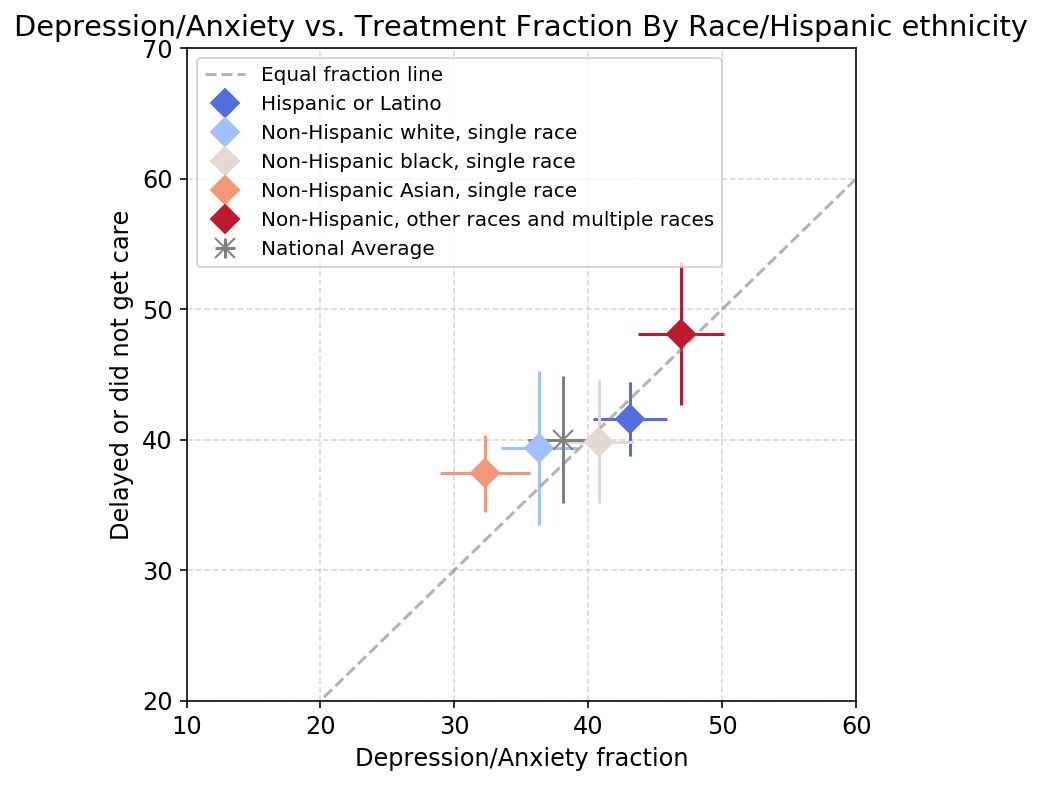

In [158]:
make_scatterplot_by_group('By Race/Hispanic ethnicity')

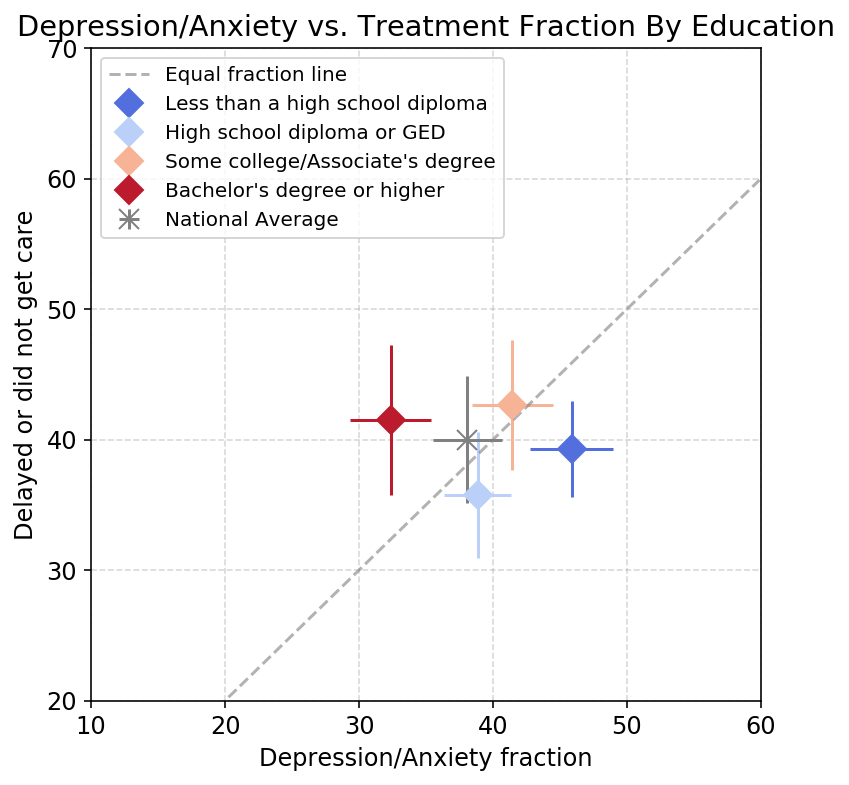

In [159]:
make_scatterplot_by_group('By Education')

# 4. data_insurance_coverage

In [51]:
print(data_insurance_coverage.keys())
print(data_insurance_coverage['Indicator'].unique())
print(data_insurance_coverage['Group'].unique())
print(data_insurance_coverage['Subgroup'].unique())

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date', 'Time Period End Date',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range',
       'Suppression Flag'],
      dtype='object')
['Uninsured at the Time of Interview' 'Public Health Insurance Coverage'
 'Private Health Insurance Coverage']
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State']
['United States' '18 - 24 years' '25 - 34 years' '35 - 44 years'
 '45 - 64 years' 'Male' 'Female' 'Hispanic or Latino'
 'Non-Hispanic white, single race' 'Non-Hispanic black, single race'
 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia'

In [52]:
def fillnan(data): # fill null by -999 
    data = data.copy()
    # fill nan
    data = data.fillna(-999)
    # remove empty week
    data = data.drop(data[data['Phase']=='-1'].index)
    # reformat start date
    data['start date'] = data['Time Period Start Date'].str.split(' 12', expand=True)[0]
    
    return data
data_insurance_coverage = fillnan(data_insurance_coverage)
data_insurance_coverage.head()

Indicator              Group          State  \
0  Uninsured at the Time of Interview  National Estimate  United States   
1  Uninsured at the Time of Interview             By Age  United States   
2  Uninsured at the Time of Interview             By Age  United States   
3  Uninsured at the Time of Interview             By Age  United States   
4  Uninsured at the Time of Interview             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 24 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  25 - 34 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  35 - 44 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  45 - 64 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   12.6    12.1     13.3         12.1 - 13.3   
1  05/05/2020 12:00:00 AM   17.7    14.2     21.6         14.2 - 21.6   
2  05/05/2020 12:00:00 AM   16.8    15.6     18.1         15.6 - 18.1   
3  05/05/2020 12:00:00 AM   12.1    10.7     13.6         10.7 - 13.6   
4  05/05/2020 12:00:00 AM    9.5     8.8     10.2          8.8 - 10.2   

  Quartile Range  Suppression Flag  start date  
0           -999            -999.0  04/23/2020  
1           -999            -999.0  04/23/2020  
2           -999            -999.0  04/23/2020  
3           -999            -999.0  04/23/2020  
4           -999            -999.0  04/23/2020

In [53]:
def get_val(indicator, group, subgroup):
    cut1 = (data_insurance_coverage['Indicator'] == indicator)
    cut2 = (data_insurance_coverage['Group'] == group)
    cut3 = (data_insurance_coverage['Subgroup'] == subgroup)

    df = data_insurance_coverage.loc[cut1 & cut2 & cut3]
    vals = df['Value'].values
    upper = df['High CI'].values
    lower = df['Low CI'].values
    time = df['Time Period'].values
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').values
    
    return time, date, vals, lower, upper

In [54]:
time_uninsured, date_uninsured, val_uninsured, lower_uninsured, upper_uninsured = get_val('Uninsured at the Time of Interview',
                                                            'National Estimate', 
                                                            'United States')
time_public, date_public, val_public, lower_public, upper_public = get_val('Public Health Insurance Coverage',
                                                            'National Estimate', 
                                                            'United States')
time_private, date_private, val_private, lower_private, upper_private = get_val('Private Health Insurance Coverage',
                                                            'National Estimate', 
                                                            'United States')

national_uninsured = np.mean(val_uninsured)
std_uninsured = np.std(val_uninsured)


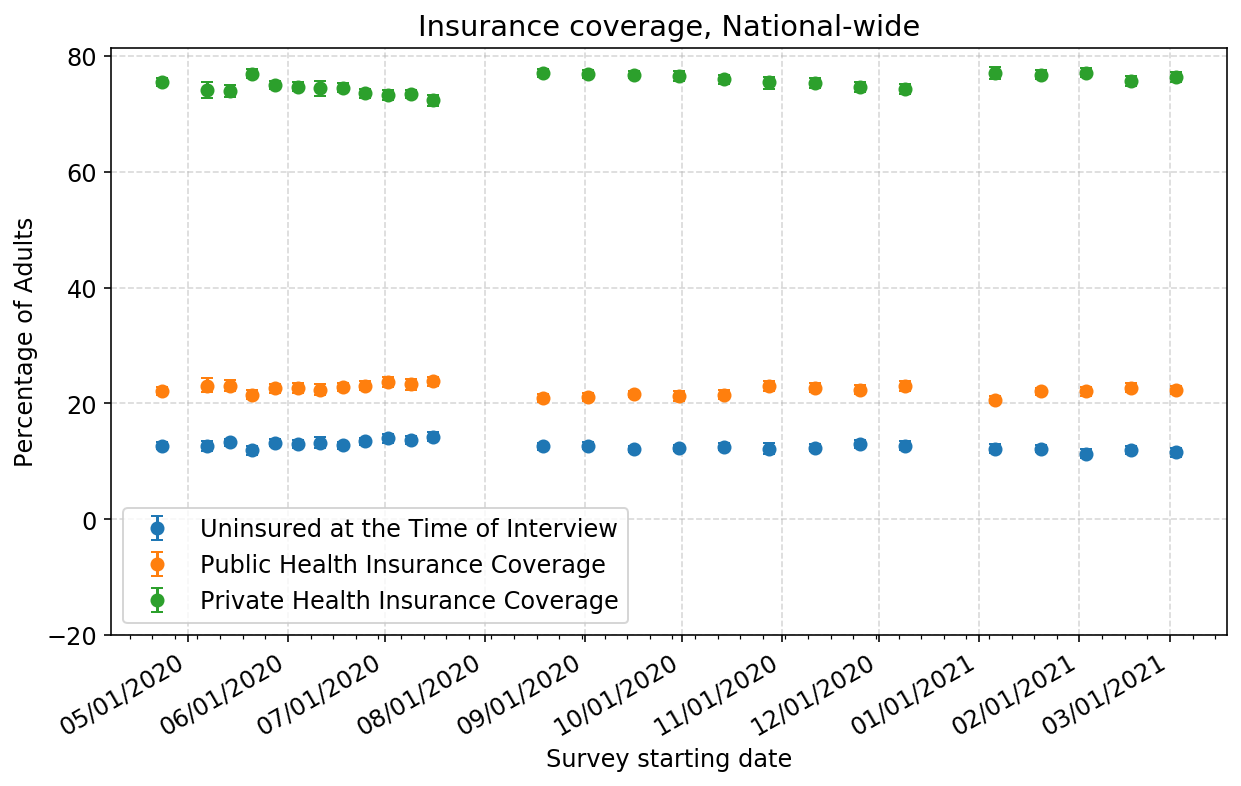

In [55]:
plt.figure(figsize=(10,6))

plt.errorbar(date_uninsured, val_uninsured, yerr=[val_uninsured - lower_uninsured, upper_uninsured - val_uninsured], fmt='o', capsize=3, label='Uninsured at the Time of Interview')
plt.errorbar(date_public, val_public, yerr=[val_public - lower_public, upper_public - val_public], fmt='o', capsize=3, label='Public Health Insurance Coverage')
plt.errorbar(date_private, val_private, yerr=[val_private - lower_private, upper_private - val_private], fmt='o', capsize=3, label='Private Health Insurance Coverage')

plt.title('Insurance coverage, National-wide')
plt.xlabel('Survey starting date')
plt.ylabel('Percentage of Adults')
plt.legend(loc='lower left')
plt.ylim(-20,)
plt.grid(linestyle='--', alpha=0.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1, byweekday=MO))

plt.gcf().autofmt_xdate()
plt.show()

In [56]:
def get_val(group, subgroup):

    cut3 = (data_insurance_coverage['Group'] == group)
    cut4 = (data_insurance_coverage['Subgroup'] == subgroup)
    cut5 = (data_insurance_coverage['Indicator'] == 'Uninsured at the Time of Interview')
    df = data_insurance_coverage.loc[cut5 & cut3 & cut4]

    vals = df['Value'].values
    upper = df['High CI'].values
    lower = df['Low CI'].values
    time = df['Time Period'].values
    date = pd.to_datetime(df['start date'], format='%m/%d/%Y').values
    
    return  vals

def make_boxplot_by_group(by_category, labels):
    plt.figure(figsize=(10,6))
    cmap1 = matplotlib.cm.get_cmap('coolwarm')

    subgroups = data_insurance_coverage.loc[data_insurance_coverage['Group']==by_category]['Subgroup'].unique()
    cnt = 0.08
    val_subgroups = []
    palette = []
    for subgroup in subgroups:
        val_treated = get_val(by_category, 
                              subgroup)
        val_subgroups.append(val_treated)
        
        palette.append(cmap1(cnt))
        cnt += 0.9/(len(subgroups)-1)

    plt.axhline(national_uninsured, linestyle='--', lw=3, color='lightblue', alpha=0.7)
    plt.fill_between(np.arange(-1,len(subgroups)+1),national_uninsured-std_uninsured,national_uninsured+std_uninsured,color='lightblue',alpha=0.3,label='Uninsured, national average')
    g = sns.boxplot(x=labels, y=val_subgroups, palette=palette)

    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.xlim(-1,len(subgroups))
    plt.title('Uninsured percentage ' + by_category)
    plt.xlabel('Subgroups')
    plt.ylabel('Percentage of Adults')
    val_subgroups = np.array(val_subgroups)
    plt.ylim(np.min(val_subgroups[val_subgroups>0])*0.5,np.max(val_subgroups[val_subgroups>0])*1.1)
    plt.legend(loc='upper right', prop={'size':11})
    plt.grid(linestyle='--', alpha=0.5)
    plt.savefig(fig_dir + 'data-insurance-coverage-' + by_category.split('/')[0].split('By ')[-1] + '.png', dpi=300, bbox='tight')
    plt.show()

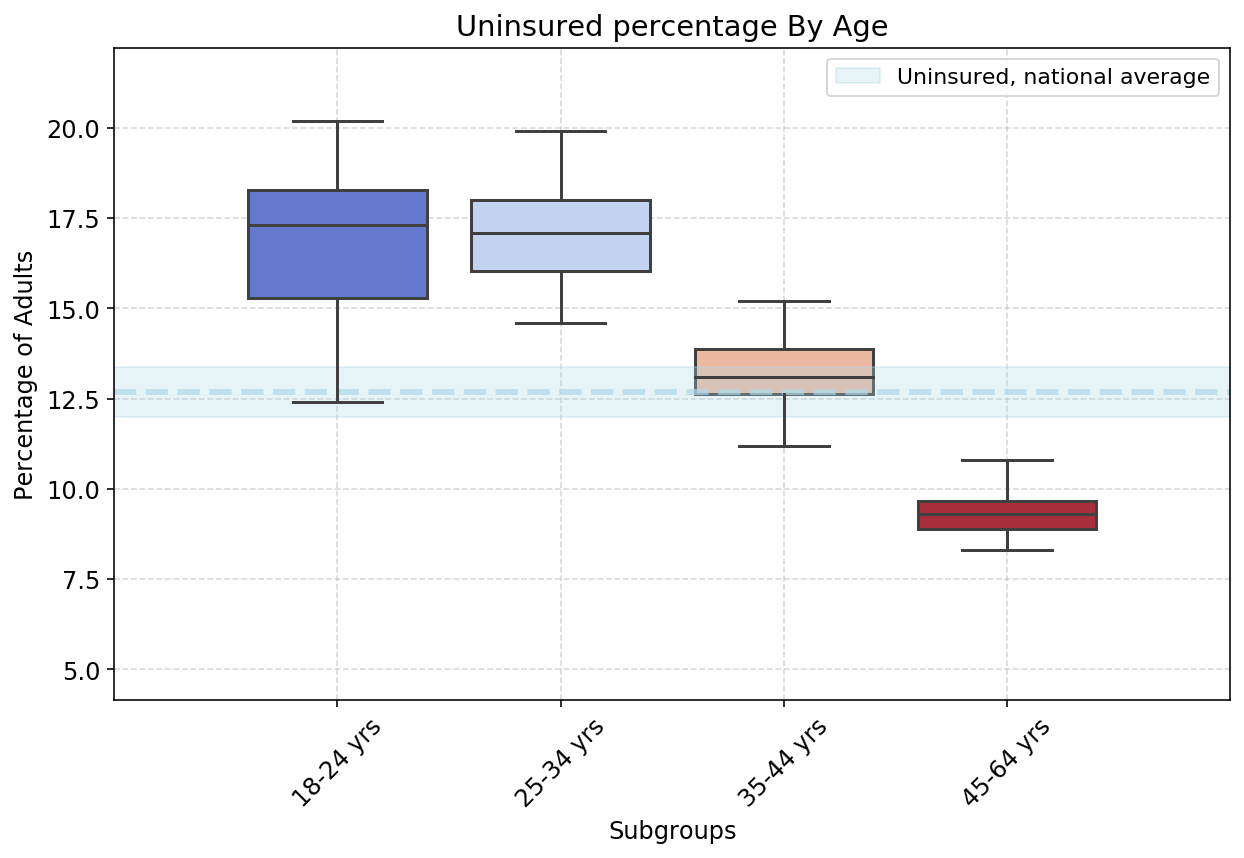

In [57]:
make_boxplot_by_group('By Age', ['18-24 yrs', '25-34 yrs', '35-44 yrs', '45-64 yrs'])

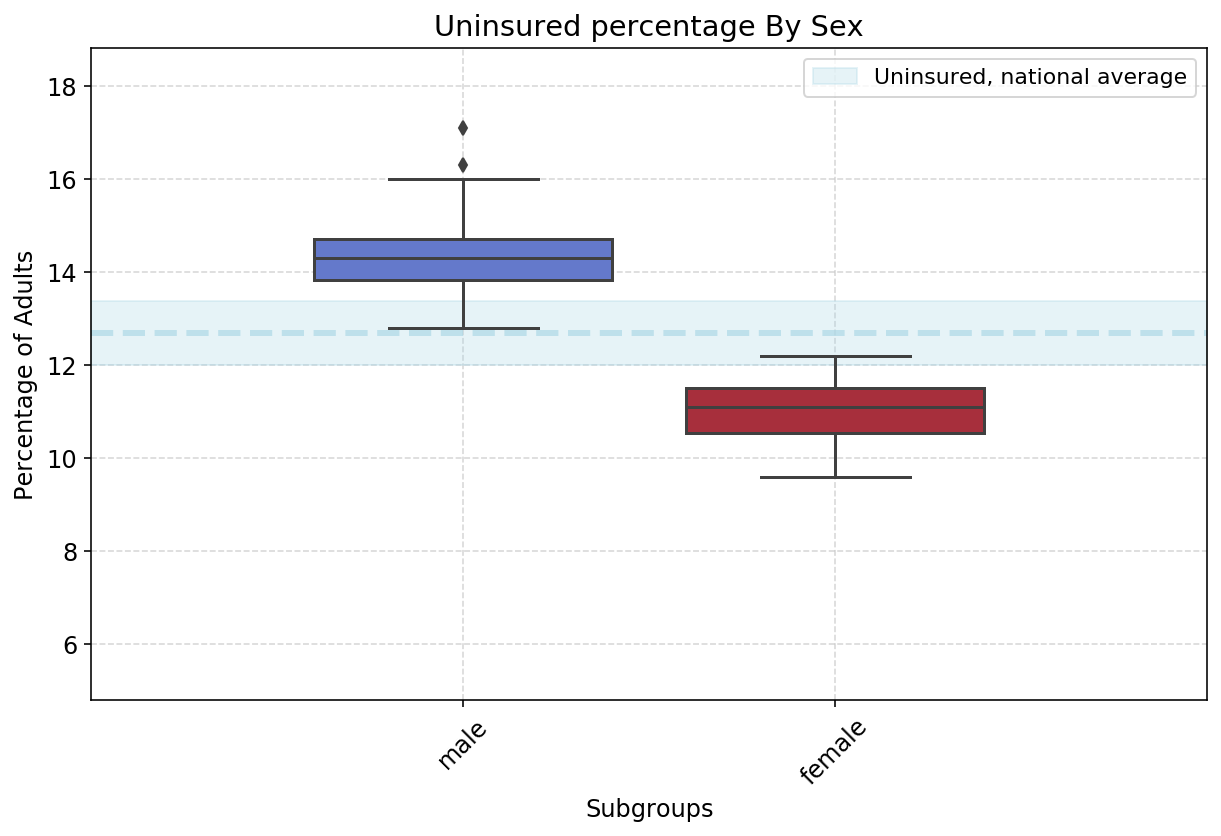

In [58]:
make_boxplot_by_group('By Sex', ['male', 'female'])

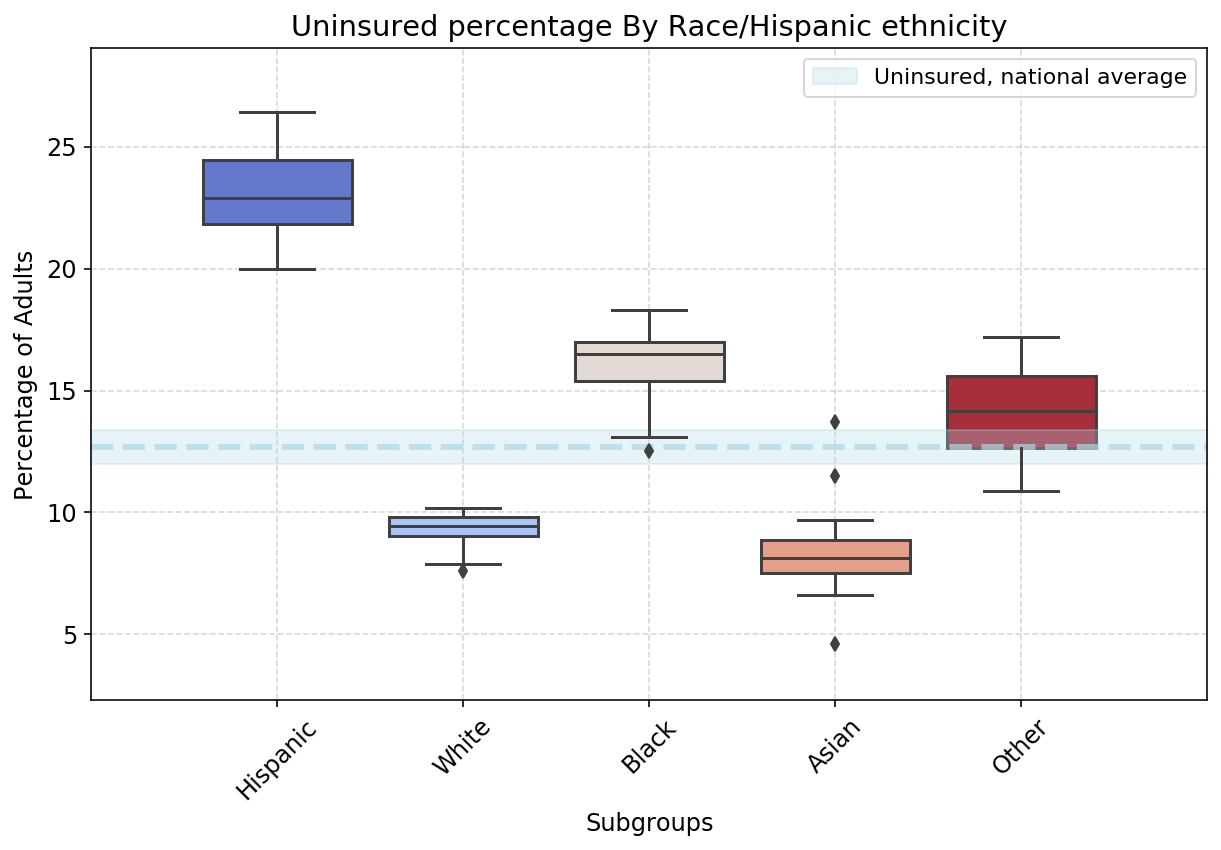

In [59]:
make_boxplot_by_group('By Race/Hispanic ethnicity', ['Hispanic',
                                                    'White',
                                                    'Black' ,
                                                    'Asian',
                                                    'Other',])

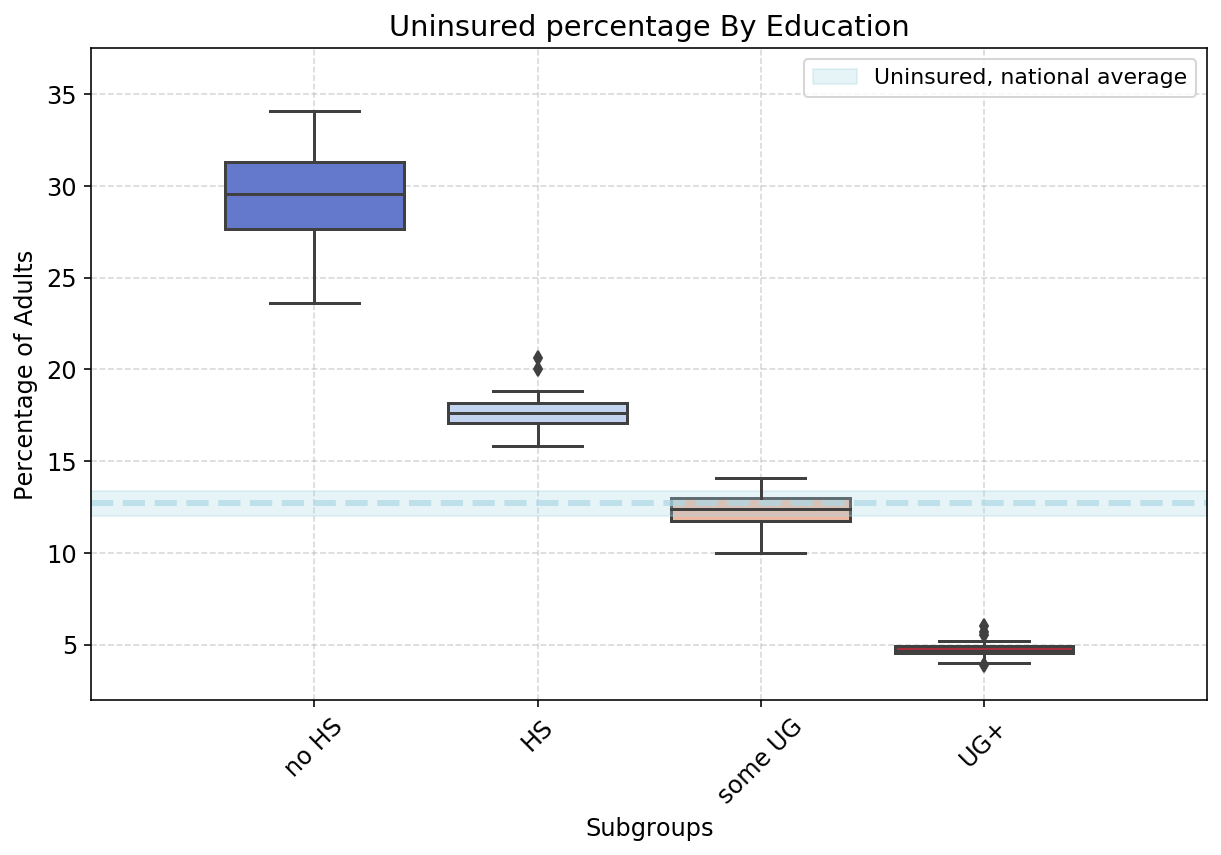

In [60]:
make_boxplot_by_group('By Education', ['no HS', 
                                        'HS',
                                        "some UG", 
                                        "UG+",])